<a href="https://imgbox.com/krMhDCkG" target="_blank"><img src="https://images2.imgbox.com/78/b0/krMhDCkG_o.png" alt="image host"/></a>

# <b>Recomendação e avaliação de restaurantes</b> 

**Ciência de Dados e Inteligência Artificial - MA5**

*Integrantes*

<table align="left">
    <tr>
        <td>Nome:</td>
        <td>Abdul Malik de Barros</td>
        <td>RA:</td>
        <td>RA00306190</td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td>Ana Beatriz Oliveira de Macedo</td>
        <td>RA:</td>
        <td>RA00297726</td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td>Ana Carolina Zhang</td>
        <td>RA:</td>
        <td>RA00297689</td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td>Bruna Bellini Faria</td>
        <td>RA:</td>
        <td>RA00297746</td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td>Heloisa Mariani Rodrigues</td>
        <td>RA:</td>
        <td>RA00297685</td>
    </tr>
    <tr>
        <td>Nome:</td>
        <td>Marina Lara</td>
        <td>RA:</td>
        <td>RA00297673</td>
    </tr>
</table>

<a href="https://github.com/brunabellini/Recomendacao_restaurantes">Acesse aqui</a> nosso repositório completo com todos os dados e informações do nosso projeto.


# <b> Sumário</b>

<a name="ancora1"></a>
### [1. Contextualização e problematização](#ancora1)
### [2. Limpeza e organização dos dados](#ancora2)
### [3. Análise exploratória](#ancora3)
### [4. Modelo K-Means Clustering (Agrupamento k-means)](#ancora4)
### [5. Modelo de NPL com Análise de sentimento](#ancora5)
### [6. Banco de dados e API](#ancora6)
### [7. Dashboard](#ancora7)
### [8. Conclusões](#ancora8)

<a id="ancora1"></a>
## <b> 1. Contextualização e problematização </b> 

Este trabalho tem como objetivo <b>fornecer ao usuário uma ferramenta que permita a busca por uma lista de estabelecimentos</b>, oferecendo informações importantes e relevantes de acessibilidade, horário de funcionamento e localização, com a <i>vantagem de apresentar um resumo das principais avaliações para que o usuário possa avaliar mais facilmente se o estabelecimento atende às suas necessidades</i>.

Além disso, este projeto visa <b>sugerir estabelecimentos similares com aqueles que o usuário está pesquisando</b>, mas que possam ser de interesse do cliente, mesmo que não façam parte daquela categoria específica.

Para alcançar esses objetivos, foram utilizadas as <b>API's do Google Maps Reviews e Google Maps Place Results</b>, que fornecem dados sobre os estabelecimentos, como região, bairro, horário de funcionamento, dias de funcionamento, categoria, preço, entre outros.

Com base nas informações fornecidas, o usuário também poderá utilizar esta ferramenta para realizar <b>pesquisas de mercado</b>, como por exemplo, ao considerar a abertura de um novo estabelecimento. Ao observar as categorias e localizações de outros estabelecimentos, é possível <i>evitar lugares de muita concorrência e explorar regiões com alta demanda e pouca concorrência</i>.

Neste contexto, o uso da <b>tecnologia de Processamento de Linguagem Natural (PLN)</b> se faz essencial para a <i>compilação e organização das informações disponíveis de forma eficiente e intuitiva para o usuário</i>. Com isso, o presente trabalho tem o intuito de oferecer uma <b>solução prática e inovadora</b> para os usuários que buscam informações sobre estabelecimentos comerciais.

<a id="ancora2"></a>
## <b> 2. Limpeza e organização dos dados </b> 

A limpeza e organização dos dados provenientes das API's do Google Maps Reviews e Google Maps Place Results são de extrema importância para <b>garantir que as informações coletadas sejam precisas, confiáveis e utilizáveis para fins diversos</b>, como análises de sentimento, pesquisa de mercado e tomada de decisões de clientes.

Ao limpar os dados, é possível remover informações duplicadas ou inconsistentes, como avaliações repetidas ou com erros ortográficos, e padronizar os <i>dados para que fiquem em um formato uniforme e fácil de serem analisados</i>.

Já a organização dos <i>dados permite que eles sejam armazenados de maneira lógica e acessível, o que facilita a sua utilização posterior</i>. Além disso, a organização pode ajudar a <i>identificar tendências e padrões nos dados</i>, o que pode ser útil para identificar áreas de melhoria ou oportunidades de negócios.

Por essas razões, foi importante investir tempo e recursos na limpeza e organização dos dados provenientes das API's do Google Maps Reviews e Google Maps Place Results, garantindo assim que eles sejam uma fonte com todas as informações corretamente organizada e limas para as próximas ações do trabalho

### Bibliotecas

In [ ]:
%pip install google-search-results
import pandas as pd
from serpapi import GoogleSearch
import ast
import re

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Recolhendo dados principais dos estabelecimentos
O primeiro tipo de dados que vamos obter são as informações básicas dos restaurantes, como: localização, nota média, faixa de preço, categoria, entre outros.
<br>
Algumas etapas são necessárias para alcançar nosso objetivo:


1.   Definir quais termos iremos passar como requisição na API para realizar pesquisas no Google Maps
2.   Realizar as requisições e armazenar os resultados
3. Passar os dados obtidos para Pandas DataFrame e aplicar as transformações necessárias a fim de facilitar o manuseio deles no decorrer do projeto
4. Armazenar os dados

### Funções 

In [ ]:
def buscar_na_api(pesquisas, key):

  '''
  Recebe a lista dos termos a serem pesquisados no Google Maps juntamente com a chave individual que possibilita que a requsição seja feita.
  Retorna lista de listas com json dos resultados obtidos, requisições que falharam e todas as pesquisas realizadas.

  pesquisas = Termos a ser pesquisado
  key = Chave individual da API
  '''
  local_results = []
  local_fail = []
  local_titles = []

  for pesquisa in pesquisas:
    print(pesquisa)
    for pg in range(0, 101, 20):
      params = {
        "engine": "google_maps",
        "q": pesquisa,
        "type": "search",
        "api_key": key,
        "start":pg,
        "ll": '@-23.5489,-46.6388,7z'
      }

      search = GoogleSearch(params)
      results = search.get_dict()
      try:
        local_results = (local_results + results["local_results"])
        local_titles.append(pesquisa)
      except:
        print('fail')
        if results['error'] == 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.':
          print(f'O último erro foi:\n{results}')
          return [local_results, local_fail, local_titles]
        else:
          local_titles.append(pesquisa)
          local_fail.append(pesquisa)
          break


  return [local_results, local_fail, local_titles]

def criando_pesquisas(locais_pesquisas, regioes_sp):
  '''
  Recebe e combina strings para retornar diversas variações de pesquisa
  locais_pesquisas = categorias pesquisadas
  regioes_sp = localização a ser pesquisada
  '''
  lista_pesquisas = []

  for l in locais_pesquisas:
    for r in regioes_sp:
      lista_pesquisas.append(l+r)
  
  return lista_pesquisas

### Definindo Pesquisas

In [ ]:
local_results = []

locais_pesquisas = [
    "Churrascaria",
    "Almoço",
    "Jantar Romântico",
    "Jantar",
    "Dogão",
    "Cachorro quente",
    "Lanche",
    "Sanduiche",
    "Prato Feito",
    "PF",
    "Sorveteria",
    "Balada",
    "Bolos",
    "Rodízio de Massas",
    "Rodízio de Doces",
    "Rodízio de Pizza",
    "Self-Service",
    "Comida de Boteco",
    "Restuarante com Vista",
    "Comida Mineira",
    "Feijoada",
    "Salada",
    "Comida Saudavel",
    "Marmita",
    "Balada Alternativa",
    "Restaurante Diferente",
    "Doceria Gourmet",
    "Petiscos",
    "Brunch",
    "Galeteria",
    "Doce Francês",
    "Doce Árabe",
    "Restaurante de Comida Chinesa",
    "Restaurante Alternativo",
    "Café Alternativo",
    "Rodízio de Drinks",
     "Comida do Norte",
    "Café em São Paulo",
    "Restaurante em São Paulo",
    "Pizzaria em São Paulo",
    "Pizzaria Napolitana em São Paulo",
    "Hamburgueria em São Paulo",
    "Rodízio de Carne em São Paulo",
    "Rodízio de Comida Japones em São Paulo",
    "Rodízio em São Paulo",
    "Bar em São Paulo",
    "Barzinho em São Paulo",
    "Pub em São Paulo",
    "Trattoria em São Paulo",
    "Padaria em São Paulo",
    "Doceria em São Paulo",
    "Boteco em São Paulo",
    "Balada em São Paulo",
    "Restaurante Italiano em São Paulo",
    "Restaurante Japonês em São Paulo",
    "Restaurante Chinês em São Paulo",
    "Restaurante Mediterrâneo em São Paulo",
    "Restaurante Árabe em São Paulo",
    "Restaurante Nordestino em São Paulo",
    "Restaurante Alemão em São Paulo",
    "Restaurante Tailandês",
    "Restaurante de Comida Australiana",
    "Restaurante de Comida Coreana",
    "Restaurante de Comida Indiana",
    "Churrascaria Argentina",
    "Churrascaria Gaúcha"
]

regioes_sp = ["", " em São Paulo Zona Norte", " em São Paulo Zona Sul", " em São Paulo", " Barato", " Caro"]

pesquisas = criando_pesquisas(locais_pesquisas, regioes_sp)

### Realizando Requisições

In [ ]:
key = '29c08d9dcd009ac3c8fe92404122edd4f29225ae6fd19b8163b705629aa1b7f5' # O limite de consultas foi esgotado
local_results = buscar_na_api(pesquisas, key)

Churrascaria
Churrascaria em São Paulo Zona Norte
Churrascaria em São Paulo Zona Sul
Churrascaria em São Paulo
Churrascaria Barato
Churrascaria Caro
fail
Almoço
Almoço em São Paulo Zona Norte
Almoço em São Paulo Zona Sul
Almoço em São Paulo
Almoço Barato
Almoço Caro
Jantar Romântico
Jantar Romântico em São Paulo Zona Norte
fail
Jantar Romântico em São Paulo Zona Sul
Jantar Romântico em São Paulo
Jantar Romântico Barato
Jantar Romântico Caro
fail
Jantar
fail
O último erro foi:
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}


### Tratando dados

In [ ]:
# dataset principal

overview = pd.DataFrame(local_results[0])

# dividindo dados de latitude e longitude em colunas distintas
gps_coordinates = pd.concat([pd.DataFrame([coo]) for coo in overview['gps_coordinates']]).reset_index()
overview = pd.concat([overview, gps_coordinates], axis=1)

# definindo colunas que irão compor o dataset
df_overview = overview[['position', 'title', 'place_id', 'data_id', 'data_cid', 'rating',
       'reviews', 'price', 'type', 'address', 'latitude', 'longitude', 'open_state',
       'description', 'thumbnail']]

In [ ]:
# dataset horarios de funcionamento

# dispondo dias e seus horarios de funcionamento em colunas distintas
titles = overview[['title',	'place_id']]
operating_hours = pd.concat([pd.DataFrame([oph]) for oph in overview['operating_hours']]).reset_index()
df_operating_hours = pd.concat([titles, operating_hours], axis=1)

# definindo colunas que irão compor o dataset
df_operating_hours =  df_operating_hours[['title', 'place_id',  'sunday',    'monday', 'tuesday', 'wednesday', 'thursday',  'friday',  'saturday']]

In [ ]:
# dataset de opções de serviço

# dispondo colunas de opção de serviço em colunas distintas
service_options = pd.concat([pd.DataFrame([so]) for so in overview['service_options']]).reset_index()
df_service_options = pd.concat([titles, service_options], axis=1)

# definindo colunas que irão compor o dataset
df_service_options = df_service_options[['title', 'place_id','index','dine_in','takeout','delivery',
           'curbside_pickup', 'no_contact_delivery','drive_through','takeaway','kerbside_pickup',
           'in_store_shopping','in_store_pickup'
           ]]

### Salvando Dados

In [ ]:
df_overview = df_overview.drop_duplicates()
df_overview.to_csv(f'df_overview (1).csv', index=False)

df_operating_hours = df_operating_hours.drop_duplicates()
df_operating_hours.to_csv(f'df_operating_hours (1).csv', index=False)

df_service_options = df_service_options.drop_duplicates()
df_service_options.to_csv(f'df_service_options (1).csv', index=False)

### Recolhendo dados de Review
Os dados de Review trazem infromações mais de talhadas dos estabelecimentos, como comentários, avaliações, horários de movimento, entre outros.<br> Diferente das informações básicas recolhidas anteriormente, nem todos os estabelcimentos terão esse tipo de dado.
<br>
Algumas etapas são necessaŕias para alcançar nosso objetivo:


1.   Definir quais estabelecimentos serão usados na consulta dentre os presentes nos Dados Gerais. 
> *Não é possível de recolher de todos. Isso porque temos uma limitação de infraestrutura referente ao limite de requisições permitidas por usuário na API. <br>
Para ilustrar, caso quisessemos pegar os dados de review dos mais de 8 mil restaurantes presentes nos Dados Gerais, precisariamos de mais de 80 Chaves individuais, o que seria inviável. <br>
Outra alternativa seria utilizar a versão paga da API, porém, levando em conta o tipo e finalidade deste projeto, também não se mostra viável.*


2.   Realizar as requisições e armazenar os resultados
3. Passar os dados obtidos para Pandas DataFrame e aplicar as transformações necessaŕias a fim de facilitar o manuseio deles no decorrer do projeto
4. Armazenar os dados

### Funções

In [ ]:
def get_review_info(params):
  c = 0
  search = GoogleSearch(params)
  results = search.get_dict()
  print(results)
  try:
    place_results = results["place_results"]
    return place_results
  except:
    print('fail')

In [ ]:
def back_to_json(txt, chave1, chave2=None):
  new_txt = txt
  # new_txt = re.sub('"', 'aspas', txt)
  new_txt = re.sub('\'', '"', new_txt)
  # new_txt = re.sub('aspas', '\'', new_txt)
  if chave2 == None:
    return ast.literal_eval(new_txt)[chave1]
  else:
    return ast.literal_eval(new_txt)[chave1][chave2]

### Definindo Restaurantes

In [ ]:
# Devido à limitação de infraestrutura da API apresentar um pequeno limite de requisições por usário, só pudemos recolher informações de review de uma amostra dos nossos dados.
place_id_list = df_overview.sample(600)
place_id_list = list(place_id_list.place_id.values)

### Realizando Requisições

In [ ]:
place_results_list = []

for p in place_id_list:
    print(p)
    params = {
      "engine": "google_maps",
      "type": "place",
      "place_id": p,
      "api_key": key
    }
    place_results_list.append(get_review_info(params))

df_review_total = pd.DataFrame(place_results_list)

ChIJ42Fbxcz5zpQRxsuNBQJI-FA
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJT7QqZLH5zpQR96zqudVH_T8
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJsRHEz95FzpQR9v0LuyCJcFw
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJqxOmKO1CzpQR1MJc-rjYTWw
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJqdjPbJZZzpQRTeo7t5wUebM
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJnYV5iUFFzpQR4PYZFvhTwC8
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJkUqZ47hZzpQRszu5LcSwgxA
{'error': 'Your searches for the month are exhausted. You can upgrade plans on SerpApi.com website.'}
fail
ChIJ1z605XdZzpQR-RnkFqONWrc
{'error': 'Your searches fo

### Tratando Dados

In [ ]:
overview_avaliacoes_list = []
most_relevant_reviews_list = []
tambem_procuram_list = []
horarios_movimento_list = [] 

for index, row in  df_review_total.iterrows():

  # tabela do overview das avaliacoes
  try:
    overview_avaliacoes = pd.DataFrame({
        'title': row['title'], 
        'place_id': row['place_id'], 
        'user_reviews(summary)': row['user_reviews']['summary'], 
        'time_spent': row['popular_times']['live_hash']['time_spent']
        })
    overview_avaliacoes_list.append(overview_avaliacoes)
  except:
    pass


  # tabela de reviews mais relevantes
  try:
    most_relevant_reviews = pd.DataFrame(row['user_reviews']['most_relevant'])
    most_relevant_reviews['title'] = row['title']
    most_relevant_reviews['place_id'] = row['place_id']
    most_relevant_reviews_list.append(most_relevant_reviews)
  except:
    pass

  # tabela de correlação entre os restaurantes
  try:
    tambem_procuram = pd.DataFrame(row['people_also_search_for'][0]['local_results'])
    tambem_procuram['estabelecimento_referencia'] = row['title']
    gps_coordinates = pd.concat([pd.DataFrame([coo]) for coo in tambem_procuram['gps_coordinates']]).reset_index()
    tambem_procuram = pd.concat([tambem_procuram, gps_coordinates], axis=1)


    tambem_procuram_list.append(tambem_procuram)
  except:
    pass


  # tabela de grafico de horáros
  try:
    horarios_movimento = pd.DataFrame(row['popular_times']['graph_results'])
    horarios_movimento['title'] = row['title']
    horarios_movimento_list.append(horarios_movimento)
  except:
    pass

### Salvando Dados

In [ ]:
overview_avaliacoes = pd.concat(overview_avaliacoes_list)
overview_avaliacoes = overview_avaliacoes.astype(str).drop_duplicates()
overview_avaliacoes.to_csv('overview_avaliacoes.csv', index=False)

most_relevant_reviews = pd.concat(most_relevant_reviews_list)
most_relevant_reviews = most_relevant_reviews[['title', 'place_id', 'username', 'rating', 'description', 'images', 'date']]
most_relevant_reviews = most_relevant_reviews.astype(str).drop_duplicates()
most_relevant_reviews.to_csv('most_relevant_reviews.csv', index=False)

tambem_procuram = pd.concat(tambem_procuram_list)
tambem_procuram = tambem_procuram[['estabelecimento_referencia', 'position', 'title', 'rating',
      'reviews', 'type', 'thumbnail', 'latitude', 'longitude',]]
tambem_procuram = tambem_procuram.astype(str).drop_duplicates()
tambem_procuram.to_csv('tambem_procuram.csv', index=False)

horarios_movimento = pd.concat(horarios_movimento_list)
horarios_movimento = horarios_movimento.astype(str).drop_duplicates()
horarios_movimento.to_csv('horarios_movimento.csv', index=False)

<a id="ancora3"></a>
## <b> 3. Análise exploratória </b>

A análise exploratória dos dados das API's do Google Maps Reviews e Google Maps Place Results é crucial para <b>compreender as características dos estabelecimentos presentes na plataforma</b>. Através da análise de diversos datasets, é possível obter insights valiosos sobre os horários de operação, informações gerais, opções de serviço ofertados e horários de movimento dos estabelecimentos, permitindo que nosso trabalho tenha um planejamento e organização voltado as informações de maior relevância.

Ao explorar esses dados, é possível <i>identificar tendências, padrões e correlações que podem ser usados para obter uma compreensão mais profunda das necessidades e comportamentos dos clientes em relação aos estabelecimentos e serviços que eles procuram</i>. Isso pode levar a <b>insights valiosos</b> sobre as preferências do público-alvo, concorrência, e até mesmo possíveis oportunidades de negócios e escolhas dos usuários.

Em resumo, a análise exploratória dos dados das API's do Google Maps Reviews e Google Maps Place Results, com bibliotecas de gráficos e mapas, é <b>fundamental para o entendimento geral do problema e identificação dos principais pontos a serem utilizados na modelagem, dashboard e até API</b>.


### Bibliotecas 

In [ ]:
import pandas as pd
import plotly.express as px
import folium
import plotly.graph_objs as go
import re
pd.set_option('display.max_columns', 30) # mostrar todas as colunas no terminal

### Importando dataframes

In [ ]:
# dataset sobre horários de operação de diversos estabelecimentos
df_op = pd.read_csv('df_operating_hours.csv', sep=',')

In [ ]:
df_op.head()

,title,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,Closed
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm


In [ ]:
# dataset sobre informações gerais de diversos estabelecimentos
df_ov = pd.read_csv('df_overview.csv', sep=',')

In [ ]:
df_ov.head()

,position,title,place_id,data_id,data_cid,rating,reviews,price,type,address,latitude,longitude,open_state,description,thumbnail
0,1,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,NaN,Restaurant,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...
1,2,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,NaN,Restaurant,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...
2,3,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,£,Buffet restaurant,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...
3,4,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,NaN,Buffet restaurant,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...
4,5,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,NaN,Restaurant,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...


In [ ]:
# dataset sobre opções de serviço ofertados de diversos estabelecimentos
df_so = pd.read_csv('df_service_options.csv', sep=',')

In [ ]:
df_so.head()

,title,place_id,dine_in,takeout,delivery,drive_through
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,True,True,False,False
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,True,True,True,False
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,True,True,False,False
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,True,True,True,False
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,True,True,False,False


In [ ]:
# dataset sobre horários de movimento de diversos estabelecimentos
df_hm = pd.read_csv('horarios_movimento.csv', sep=',')

In [ ]:
df_hm.head()

,sunday,monday,tuesday,wednesday,thursday,friday,saturday,title
0,"{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}","{'time': '6\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
1,"{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}","{'time': '7\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
2,"{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}","{'time': '8\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
3,"{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}","{'time': '9\u202fAM', 'busyness_score': 0}",Por um Punhado de Dólares
4,"{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...","{'time': '10\u202fAM', 'info': 'Usually not to...",Por um Punhado de Dólares


In [ ]:
# dataset sobre estabelecimentos relacionados com informações gerais
df_tp = pd.read_csv('tambem_procuram.csv', sep=',')

In [ ]:
df_tp.head()

,estabelecimento_referencia,position,title,rating,reviews,type,thumbnail,latitude,longitude
0,Por um Punhado de Dólares,1,YERBA + Por um Punhado de Dólares,4.8,931,"['Coffee shop', 'Bar', 'Book store', 'Pub', 'R...",https://lh5.googleusercontent.com/p/AF1QipO7UG...,-23.534373,-46.652746
1,Por um Punhado de Dólares,2,Urbe Cafe Bar,4.5,5879,"['Coffee store', 'Bar', 'Brunch', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipOGuR...,-23.555976,-46.658378
2,Por um Punhado de Dólares,3,KOF - King of The Fork,4.5,1945,"['Coffee store', 'Breakfast', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipMeeB...,-23.564052,-46.683767
3,Por um Punhado de Dólares,4,Café Girondino,4.5,6548,"['Cafe', 'Breakfast', 'Cafeteria', 'Cocktail b...",https://lh5.googleusercontent.com/p/AF1QipO9py...,-23.544683,-46.634228
4,Por um Punhado de Dólares,5,Barões do Cafe,4.1,122,['Coffee shop'],https://lh5.googleusercontent.com/p/AF1QipMT6j...,-23.557180,-46.663046


### Organizando datasets

In [ ]:
# juntando os dataset que contem a coluna "place_id" para termos as informações de estabelecimentos em um único lugar
df_junto = pd.merge(df_op, df_ov, on='place_id', how='outer')
df_estabelecimentos = pd.merge(df_junto, df_so, on='place_id', how='outer')

In [ ]:
df_estabelecimentos = df_estabelecimentos.drop(['title_x', 'title_y'], axis=1)
df_estabelecimentos.head()

,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,position,data_id,data_cid,rating,reviews,price,type,address,latitude,longitude,open_state,description,thumbnail,title,dine_in,takeout,delivery,drive_through
0,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,1,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,NaN,Restaurant,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...,Sagrado Almoço,True,True,False,False
1,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,2,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,NaN,Restaurant,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...,2 L's Restaurante E Bar Almoço-Lanches,True,True,True,False
2,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,3,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,£,Buffet restaurant,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...,Brasiliano Restaurante,True,True,False,False
3,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,Closed,4,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,NaN,Buffet restaurant,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...,Sirva-se Almoço,True,True,True,False
4,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,5,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,NaN,Restaurant,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...,Speed Almoço,True,True,False,False


In [ ]:
# df_estabelecimentos.to_csv('info_estabelecimentos.csv', index=False)

### Analisando dados e informações

#### Dataset informações gerais do estabelecimento 

In [ ]:
# Plotar um histograma da coluna 'rating'
fig = go.Figure(
    [go.Histogram(
        x=df_estabelecimentos['rating'],
        nbinsx=10
    )])

fig.update_layout(
    title='Distribuição da Classificação Média dos Locais',
    xaxis_title='Classificação Média',
    yaxis_title='Frequência')

fig.show()

O histograma mostra que a maioria dos locais tem uma classificação média entre 4.3 e 4.7, o que indica que a qualidade dos locais é geralmente bem avaliada pelos clientes. Há também uma pequena quantidade de locais com classificação média abaixo de 3.7, o que indica que temos em nossa base poucos estabelecimentos com problemas de qualidade.

In [ ]:
# converte os dias da semana para uma lista
dias_da_semana = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

# cria um dicionário para armazenar a soma da quantidade de restaurantes abertos por dia da semana
quantidade_por_dia = {}
for dia in dias_da_semana:
    quantidade_por_dia[dia] = len(df_estabelecimentos[df_estabelecimentos[dia] != 'Closed'])

# cria o gráfico de barras
fig = go.Figure(
    [go.Bar(
        x=dias_da_semana,
        y=list(quantidade_por_dia.values())
    )])

fig.update_layout(
    title='Quantidade de Estabelecimentos Abertos por Dia da Semana',
    xaxis_title='Dia da Semana',
    yaxis_title='Quantidade de Estabelecimentos',
    xaxis_tickangle=--30)

fig.show()

O gráfico de barras mostra a quantidade de estabelecimentos abertos por dia da semana, revelando que quarta-feira, quinta-feira e sexta-feira são os dias em que a maioria dos estabelecimentos estão abertos, enquanto domingo é o dia em que menos estabelecimentos estão abertos, provavelmente para descanso dos funcionários, ou ainda, para reduzir custos com energia elétrica e outros gastos fixos pelo menor movimento em comparação aos outros dias. Isso pode ser útil para ajudar a planejar atividades de alimentação fora de casa e para entender melhor os hábitos dos estabelecimentos.

In [ ]:
# Agrupar por categoria e contar a quantidade de ocorrências
frequencia_tipo = df_estabelecimentos.groupby('type').size().reset_index(name='quantidade')

# Ordenar em ordem decrescente pela quantidade
frequencia_tipo = frequencia_tipo.sort_values(by='quantidade', ascending=False)

# Selecionar apenas as 5 categorias com maior frequência
top_10 = frequencia_tipo.iloc[:10]

# Criar o gráfico de barras
fig = px.bar(top_10, x='type', y='quantidade', color='type')

# Configurar o layout do gráfico
fig.update_layout(title='Top 10 Categorias de Restaurantes', xaxis_title='Categoria', yaxis_title='Quantidade')

# Exibir o gráfico
fig.show()

In [ ]:
# Selecionar os tipos de estabelecimentos a serem analisados
tipos_selecionados = ['Restaurant', 'Bar', 'Pizza restaurant', 'Snack bar', 'Fast food restaurant']

# Criar um dicionário para armazenar a quantidade de estabelecimentos abertos por dia da semana para cada tipo
dados_por_tipo = {}
for tipo in tipos_selecionados:
    df_tipo = df_estabelecimentos[df_estabelecimentos['type'] == tipo]
    quantidade_por_dia = {}
    for dia in dias_da_semana:
        quantidade_por_dia[dia] = len(df_tipo[df_tipo[dia] != 'Closed'])
    dados_por_tipo[tipo] = quantidade_por_dia

# Criar o gráfico de barras empilhadas
fig = go.Figure()
for tipo in tipos_selecionados:
    fig.add_trace(go.Bar(
        x=dias_da_semana,
        y=list(dados_por_tipo[tipo].values()),
        name=tipo
    ))

fig.update_layout(
    title='Quantidade de Estabelecimentos Abertos por Dia da Semana',
    xaxis_title='Dia da Semana',
    yaxis_title='Quantidade de Estabelecimentos',
    barmode='stack',
    xaxis_tickangle=-30
)

fig.show()

Para analisar melhor a abertura dos estabelecimentos por categoria, vemos nesse primeiro gráfico de barras as top 10 categorias que mais possuem estabelecimentos cadastrados no nosso dataset, entre els restaurantes, bar, pizzaria, snack bar, fast food, hamburgueria, sorveteria, restaurante italiano, buffet e padaria. Levando em conta as 5 top categorias podemos observar que a maioria dos restaurantes abre às quintas-feiras e que os domingos são os dias com menos estabelecimentos abertos. Já para bares, a maior quantidade de estabelecimentos abertos é aos sábados, enquanto as segundas-feiras possuem a menor quantidade. Nas pizzarias, sábados também são o dia com mais estabelecimentos abertos e as segundas-feiras possuem a menor quantidade. Para os snack bars, quintas-feiras têm a maior quantidade de estabelecimentos abertos e as segundas-feiras possuem a menor quantidade. Por fim, fast foods têm a maior quantidade de estabelecimentos abertos às quintas-feiras e a menor quantidade aos domingos.

Esses resultados podem ser explicados por ser comum que as pessoas saiam para jantar ou beber em bares e restaurantes às quintas-feiras, após um dia de trabalho, enquanto nos domingos muitas pessoas preferem ficar em casa com a família. Já aos sábados, pode haver maior procura por estabelecimentos de entretenimento noturno, o que explicaria a maior quantidade de bares e pizzarias abertas neste dia. Em geral, essas informações podem ser úteis para os proprietários desses estabelecimentos, permitindo que eles possam otimizar seus horários de funcionamento para atender melhor à demanda de seus clientes. 

In [ ]:
# calcula a frequência de cada serviço
freq_servicos = df_estabelecimentos[['dine_in', 'takeout', 'delivery', 'drive_through']].sum()

# cria o gráfico de pizza com a frequência de cada serviço
fig = go.Figure(
    go.Pie(
        labels=freq_servicos.index.tolist(),
        values=freq_servicos.values.tolist(),
        hole=0.4,
        textposition='inside',
        textinfo='percent+label'
    ))

fig.update_layout(
    title='Disponibilidade de Serviços nos Locais',)

fig.show()

Podemos observar que a maioria dos estabelecimentos disponibilizam o serviço de "dine in" (46,6%), seguido do serviço "takeout" (41,9%). O serviço de "delivery" é oferecido em apenas 10,1% dos locais e o serviço de "drive through" é o menos comum, disponível em somente 1,36% dos estabelecimentos. Essas informações podem ser úteis para entender as preferências dos consumidores e ajudar os empreendedores a decidir quais serviços oferecer em seus estabelecimentos

In [ ]:
# selecionar as colunas de interesse
df_servicos = df_estabelecimentos[['type', 'dine_in', 'takeout', 'delivery', 'drive_through']]

# agrupar por tipo de estabelecimento e calcular a frequência de cada serviço
freq_servicos_por_tipo = df_servicos.groupby('type').sum()

# calcular a porcentagem de cada serviço para cada tipo de estabelecimento
porcentagem_servicos_por_tipo = (freq_servicos_por_tipo.div(freq_servicos_por_tipo.sum(axis=1), axis=0) * 100).round(2)

# mostrar a tabela de porcentagem de serviços por tipo de estabelecimento
print(porcentagem_servicos_por_tipo)

                              dine_in  takeout  delivery  drive_through
type                                                                   
Adult entertainment club          NaN      NaN       NaN            NaN
Advertising agency                NaN      NaN       NaN            NaN
African restaurant              50.00    50.00      0.00            0.0
American restaurant             43.48    34.78     13.04            8.7
Andalusian restaurant          100.00     0.00      0.00            0.0
...                               ...      ...       ...            ...
Wine store                      33.33    33.33     33.33            0.0
Wine wholesaler and importer    50.00     0.00     50.00            0.0
Yakisoba Restaurant             50.00    50.00      0.00            0.0
Yakitori restaurant             50.00    50.00      0.00            0.0
Zoo                               NaN      NaN       NaN            NaN

[327 rows x 4 columns]


Agora exploramos mais a porcentagem presença de cada tipo de restaurante em cada segmento, e é notável que dine in e takeout são muito presentes na maioria das categorias, principalmente aquelas que envolvem restaurantes e lojas ao contrário de delivery e drive through que se concentram em segmentos mais de fast food, comida americana e lojas de bebidas 

In [ ]:
# Contar valores nulos e não nulos na coluna de descrição
print(df_estabelecimentos['description'].isnull().value_counts())

True     7681
False    2319
Name: description, dtype: int64


A grande maioria dos estabelecimentos (aproximadamente 76,81%) não possui descrição disponível nessa coluna. Já os outros 23,19% possuem algum tipo de descrição cadastrada. É importante considerar que a falta de descrição pode dificultar a busca e seleção de estabelecimentos pelos clientes, além de limitar a informação disponível para análise.

In [ ]:
# Contar valores nulos e não nulos na coluna de endereço
print(df_estabelecimentos['address'].isnull().value_counts())

False    9936
True       64
Name: address, dtype: int64


A grande maioria dos estabelecimentos (99,36%) possui informações de endereço preenchidas, enquanto apenas 0,64% dos estabelecimentos (0,64%) não possuem essa informação. Podemos pensar que essa minoria que não possui endereço sejam estabelecimentos online que não possuem nenhum tipo de endereço físico.

In [ ]:
df_estabelecimentos = df_estabelecimentos.dropna(subset=['latitude', 'longitude'])

# Criar um mapa com a localização dos locais
mapa = folium.Map(location=[df_estabelecimentos['latitude'].mean(), df_estabelecimentos['longitude'].mean()], zoom_start=12)

for i, row in df_estabelecimentos.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(mapa)

# Exibir o mapa
mapa

Mapa com todos os estabelecimentos e suas localizações para explorar regiões e estabelecimentos pelo mapa de São Paulo

#### Dataset sobre os horários de movimento

Ajustando dataset para ter somente o valor do busyness_score de cada restaurante com seu nome

In [ ]:
# Selecionar as colunas desejadas
colunas_dias_semana = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
df_dias_semana = df_hm[colunas_dias_semana]

# Definir a função para extrair o valor do busyness_score
def extrair_score(coluna):
    # Extrair o valor usando regex
    match = re.search("'busyness_score':\s*(\d+)", str(coluna))
    if match:
        return match.group(1)
    else:
        return None

# Aplicar a função a todas as colunas selecionadas
df_dds = df_dias_semana.apply(lambda x: x.apply(extrair_score))

# Concatenar as colunas em um novo dataframe
df_final = pd.concat([df_hm['title'], df_dds], axis=1)

# Exibir o resultado
df_final

,title,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,Por um Punhado de Dólares,0,0,0,0,0,0,0
1,Por um Punhado de Dólares,0,0,0,0,0,0,0
2,Por um Punhado de Dólares,0,0,0,0,0,0,0
3,Por um Punhado de Dólares,0,0,0,0,0,0,0
4,Por um Punhado de Dólares,27,39,29,34,34,31,29
...,...,...,...,...,...,...,...,...
5399,Emporio Akkar,None,0,0,0,0,0,0
5400,Emporio Akkar,None,0,0,0,0,0,0
5401,Emporio Akkar,None,0,0,0,0,0,0
5402,Emporio Akkar,None,0,0,0,0,0,0


In [ ]:
# Selecionar apenas as linhas com valores acima de zero e não nulos
df_filtrado = df_final.loc[(df_final[colunas_dias_semana].astype(float) > 0).any(axis=1) & df_final[colunas_dias_semana].notnull().all(axis=1)]

# Exibir o resultado
df_filtrado.head()

,title,sunday,monday,tuesday,wednesday,thursday,friday,saturday
4,Por um Punhado de Dólares,27,39,29,34,34,31,29
5,Por um Punhado de Dólares,45,51,44,48,51,44,47
6,Por um Punhado de Dólares,64,63,58,60,69,55,65
7,Por um Punhado de Dólares,80,72,70,69,81,63,77
8,Por um Punhado de Dólares,90,78,76,72,81,65,86


#### Dataset sobre relações entre estabelecimentos

In [ ]:
df_tp

,estabelecimento_referencia,position,title,rating,reviews,type,thumbnail,latitude,longitude
0,Por um Punhado de Dólares,1,YERBA + Por um Punhado de Dólares,4.8,931,"['Coffee shop', 'Bar', 'Book store', 'Pub', 'R...",https://lh5.googleusercontent.com/p/AF1QipO7UG...,-23.534373,-46.652746
1,Por um Punhado de Dólares,2,Urbe Cafe Bar,4.5,5879,"['Coffee store', 'Bar', 'Brunch', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipOGuR...,-23.555976,-46.658378
2,Por um Punhado de Dólares,3,KOF - King of The Fork,4.5,1945,"['Coffee store', 'Breakfast', 'Coffee shop']",https://lh5.googleusercontent.com/p/AF1QipMeeB...,-23.564052,-46.683767
3,Por um Punhado de Dólares,4,Café Girondino,4.5,6548,"['Cafe', 'Breakfast', 'Cafeteria', 'Cocktail b...",https://lh5.googleusercontent.com/p/AF1QipO9py...,-23.544683,-46.634228
4,Por um Punhado de Dólares,5,Barões do Cafe,4.1,122,['Coffee shop'],https://lh5.googleusercontent.com/p/AF1QipMT6j...,-23.557180,-46.663046
...,...,...,...,...,...,...,...,...,...
1834,Emporio Akkar,1,Empório Syrio,4.6,428,"['Gourmet grocery store', 'Market']",https://lh5.googleusercontent.com/p/AF1QipNV1X...,-23.543061,-46.631866
1835,Emporio Akkar,2,Tio Ali Empório Árabe,4.8,33,['Gourmet grocery store'],https://lh5.googleusercontent.com/p/AF1QipMPFT...,-23.541785,-46.629380
1836,Emporio Akkar,3,Maxifour Lebanon Market Center - Empório Árabe,4.4,1155,"['Gourmet grocery store', 'Condiments supplier...",https://lh5.googleusercontent.com/p/AF1QipNz6S...,-23.613913,-46.658768
1837,Emporio Akkar,4,Raful Cozinha Árabe - 25 de Março,4.6,7929,"['Middle Eastern', 'Sfiha restaurant']",https://lh5.googleusercontent.com/p/AF1QipOEhq...,-23.543192,-46.631870


Você pode usar esse dataset, para filtrar restaurante e achar suas similaridades com os outros estabelecimentos.

<a id="ancora4"></a>
## <b> 4. Modelo K-Means Clustering (Agrupamento k-means)</b> 

### Segmentação de restaurantes com KMeans

O modelo K-Means clustering é uma <b>técnica popular de agrupamento que pode ser usada para segmentar estabelecimentos de acordo com suas informações gerais</b>. O algoritmo funciona agrupando as observações em clusters ou grupos, com base na similaridade de suas características. No contexto de segmentação de estabelecimentos, essas características podem incluir dados de funcionamento, como dias, horários e lotação, bem como informações sobre a localização geográfica dos estabelecimentos e outros dados relevantes.

Ao aplicar o modelo K-Means clustering a um conjunto de dados de estabelecimentos, <i>o algoritmo tenta encontrar grupos de estabelecimentos que compartilham características semelhantes. Esses grupos podem ser usados para entender melhor as necessidades e preferências dos diferentes segmentos de clientes e estabelecimentos.</i>

### Importando Biliotecas

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import utm
from shapely.geometry import Point

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as shc

from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('df_operating_hours.csv',sep=',')
df

,title,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,Closed
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm
...,...,...,...,...,...,...,...,...,...
9995,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,1 pm–12 am,11:30 am–10 pm,11:30 am–10 pm,11:30 am–10 pm,11:30 am–10 pm,1 pm–12 am,1 pm–12 am
9996,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,7 pm–12 am,Closed,7 pm–12 am,7 pm–12 am,7 pm–12 am,7 pm–12 am,7 pm–12 am
9997,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,2–10 pm,Closed,Closed,6 pm–12 am,6 pm–12 am,6 pm–12 am,2 pm–12 am
9998,O Pingado,ChIJb70UCdlXzpQRsqTkBxeES1o,Closed,Closed,6:30–11:30 pm,6:30–11:30 pm,6:30–11:30 pm,6:30–11:30 pm,6:30–11:30 pm


### Data Prep
#### Feature engineering para tratamento de dados com horário de funcionamento

In [7]:
def to_float(txt):
  '''
  transforma a string de horario em float. ex: 8:30pm -> 20.5 / 9am -> 9.0
  '''
  txt = txt.lower()
  if re.search('am', txt) == None:
    txt = re.sub('(pm *)', '', txt)
    txt = separa_hora_minuto(txt)
    txt = int(txt[0])+12+(int(txt[1])*(10/6)/100)
  else:
    txt = re.sub('(am *)', '', txt)
    txt = separa_hora_minuto(txt)
    txt = int(txt[0])+(int(txt[1])*(10/6)/100)
  return float(txt) if float(txt) >= 1 else float(txt)+24

def separa_hora_minuto(txt):
  '''
  separação simples do horário e minuto.
  Aqui também o 12 é transformado em 0, para caber na nossa logica de relogio de 12h para relogio de 24h
  '''
  txt = txt.split(':')
  if int(txt[0]) == 12:
    txt[0] = 0
  if len(txt) == 1:
    txt.append('0')
  return txt

def definindo_inicio_fim(df):
  '''
  recebe um daframe com os horarios de funcionamento de cada dia e centraliza em apenas suas colunas o horario de abertura/fechamento.
  O dia escolhido para representar o horario de funcionamento majoritário é o primeiro que não estja fechado
  de acorodo com a ordem da lista 'dias_da_semana' (quase todos os restaurantes utilizam a sexta)
  '''
  dias_da_semana = [ 'friday', 'saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday']
  for index, row in df.iterrows():
    for d in dias_da_semana:
      try:
        df.loc[index, 'inicio'] = to_float(row[d].split('–')[0])
        df.loc[index, 'fim'] = to_float(row[d].split('–')[1])
        break
      except:
        pass
  return df
def dias_aberto(df):
  '''
  Recebe dataframe com horario de funcionamento dos dias da semana e simplifica para apenas a infromação de se abre ou não em cada um dos dias
  '''
  # considerei sexta como final de semana
  dias_de_semana = [ 'monday', 'tuesday', 'wednesday', 'thursday']
  dias_final_de_semana = [ 'friday', 'saturday', 'sunday']

  for index, row in df.iterrows():
    aberto_fds = 0
    aberto_semana = 0
    for d in dias_de_semana:
      if str(row[d]).lower() == 'closed':
         df.loc[index, d] = 'Closed'
      else:
        df.loc[index, d] = 'Open'
        aberto_semana += 1
    for d in dias_final_de_semana:
      if str(row[d]).lower() == 'closed':
         df.loc[index, d] = 'Closed'
      else:
        df.loc[index, d] = 'Open'
        aberto_fds += 1
      df.loc[index, 'aberto_dia_util(%)'] = round(aberto_semana/len(dias_de_semana)*100,1)
      df.loc[index, 'aberto_final_de_semana(%)'] = round(aberto_fds/len(dias_final_de_semana)*100,1)
  return df
def porcentagem_por_periodo(inicio, fim, periodos):
  '''
  Verifica quantas horas cada restaurante fica aberto em cada peridodo.
  Para normalizar os dados, esses numero são transformados em porcentagem. ex: um restaurante que fica aberto das 6-20h fica aberto 100% do horário da manha (pois o periodo da
  manha vai das 6 às 12h), ou seja, a manha inteira (100%).
  '''
  aberto_periodo = dict()
  for p in periodos:
    inicio_periodo = periodos[p][0]
    fim_periodo = periodos[p][1]
    total_periodo = fim_periodo - inicio_periodo
    if inicio <= fim_periodo and fim >= inicio_periodo:
      aberto_periodo[p] = round((min(fim, fim_periodo) - max(inicio, inicio_periodo))/total_periodo*100,0)
    else:
      aberto_periodo[p] = 0
  
  return aberto_periodo.values()

In [8]:
df

,title,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm,8 am–8 pm
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm,11:30 am–2:30 pm
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm,11 am–2:30 pm
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,11 am–3 pm,Closed
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm,11 am–10 pm
...,...,...,...,...,...,...,...,...,...
9995,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,1 pm–12 am,11:30 am–10 pm,11:30 am–10 pm,11:30 am–10 pm,11:30 am–10 pm,1 pm–12 am,1 pm–12 am
9996,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,7 pm–12 am,Closed,7 pm–12 am,7 pm–12 am,7 pm–12 am,7 pm–12 am,7 pm–12 am
9997,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,2–10 pm,Closed,Closed,6 pm–12 am,6 pm–12 am,6 pm–12 am,2 pm–12 am
9998,O Pingado,ChIJb70UCdlXzpQRsqTkBxeES1o,Closed,Closed,6:30–11:30 pm,6:30–11:30 pm,6:30–11:30 pm,6:30–11:30 pm,6:30–11:30 pm


In [9]:
def funcionamento_por_periodo(df, periodos):
  '''
  atribui ao dataframe colunas que traduzem qual porcentagem de horas de cada periodo eles ficam abertos.
  ex: um restaurante que fica aberto das 6-20h fica aberto 100% dos horários da manha (pois o pedio da
   manha vai das 6 às 12h), ou seja, a manha inteira.
  '''

  for index, row in df.iterrows():
    inicio = row['inicio']
    fim = row['fim']
    if fim < inicio:
      # em alguns casos o horario de funcionamento de determinado dia indicava o que parecia ser
      # a manhã do dia seguinte ex: 11am às 10am. com esse tratamento limitamos como limite de funcionamento de um determiando dia
      # a sua última hora (24h -> meia noite)
      fim = 24
    df.loc[index, list(periodos.keys())] = porcentagem_por_periodo(inicio, fim, periodos)
  
  return df
def definir_inicio_fim_periodo(df, periodos):
  '''
  retorna colunas que indicam em que periodo o restaurante abre/fecha
  '''
  for index, row in df.iterrows():
    inicio = row['inicio']
    fim = row['fim']
    for p in periodos:
        inicio_periodo = periodos[p][0]
        fim_periodo = periodos[p][1]
        if inicio <= fim_periodo and inicio >= inicio_periodo:
          df.loc[index, 'inicio_periodo'] = p
          break
    for p in periodos:
        inicio_periodo = periodos[p][0]
        fim_periodo = periodos[p][1]
        if fim <= fim_periodo and fim >= inicio_periodo:
            df.loc[index, 'fim_periodo'] = p
            break
    
  return df

In [10]:
# add colunas como horario de abertura e fechamento (explicacao mais detalhada na funcao)
df = definindo_inicio_fim(df)

# Convertendo horarios de abertura por dia para se abre ou não aquele dia
df = dias_aberto(df)

In [11]:
madrugada = [1, 5.9]
manha = [6, 11.9]
tarde = [12, 18.9]
noite = [19, 24.9]

periodos = {
    'madrugada': madrugada, 
    'manha': manha, 
    'tarde': tarde, 
    'noite': noite
}

In [12]:
# adicionando colunas que indicam quantos % de cada período o restaurante está aberto
#  ex: um restaurante que fica aberto das 6-20h fica aberto 100% do horário da manha (pois o periodo da
# manha vai das 6 às 12h), ou seja, a manha inteira (100%).
df = funcionamento_por_periodo(df, periodos)
df

,title,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,inicio,fim,aberto_dia_util(%),aberto_final_de_semana(%),madrugada,manha,tarde,noite
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,Open,Open,Open,Open,Open,Open,8.0,20.0,100.0,66.7,0.0,66.0,100.0,17.0
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,Open,Open,Open,Open,Open,Open,11.5,14.5,100.0,66.7,0.0,7.0,36.0,0.0
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,Open,Open,Open,Open,Open,Open,11.0,14.5,100.0,66.7,0.0,15.0,36.0,0.0
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,Open,Open,Open,Open,Open,Closed,11.0,15.0,100.0,33.3,0.0,15.0,43.0,0.0
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,Open,Open,Open,Open,Open,Open,11.0,22.0,100.0,66.7,0.0,15.0,100.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,Open,Open,Open,Open,Open,Open,Open,13.0,24.0,100.0,100.0,0.0,0.0,86.0,85.0
9996,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,Open,Closed,Open,Open,Open,Open,Open,19.0,24.0,75.0,100.0,0.0,0.0,0.0,85.0
9997,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,Open,Closed,Closed,Open,Open,Open,Open,18.0,24.0,50.0,100.0,0.0,0.0,13.0,85.0
9998,O Pingado,ChIJb70UCdlXzpQRsqTkBxeES1o,Closed,Closed,Open,Open,Open,Open,Open,18.5,23.5,75.0,66.7,0.0,0.0,6.0,76.0


In [13]:
df = definir_inicio_fim_periodo(df, periodos)
df

,title,place_id,sunday,monday,tuesday,wednesday,thursday,friday,saturday,inicio,fim,aberto_dia_util(%),aberto_final_de_semana(%),madrugada,manha,tarde,noite,inicio_periodo,fim_periodo
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,Closed,Open,Open,Open,Open,Open,Open,8.0,20.0,100.0,66.7,0.0,66.0,100.0,17.0,manha,noite
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,Closed,Open,Open,Open,Open,Open,Open,11.5,14.5,100.0,66.7,0.0,7.0,36.0,0.0,manha,tarde
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,Closed,Open,Open,Open,Open,Open,Open,11.0,14.5,100.0,66.7,0.0,15.0,36.0,0.0,manha,tarde
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,Closed,Open,Open,Open,Open,Open,Closed,11.0,15.0,100.0,33.3,0.0,15.0,43.0,0.0,manha,tarde
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,Closed,Open,Open,Open,Open,Open,Open,11.0,22.0,100.0,66.7,0.0,15.0,100.0,51.0,manha,noite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,Open,Open,Open,Open,Open,Open,Open,13.0,24.0,100.0,100.0,0.0,0.0,86.0,85.0,tarde,noite
9996,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,Open,Closed,Open,Open,Open,Open,Open,19.0,24.0,75.0,100.0,0.0,0.0,0.0,85.0,noite,noite
9997,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,Open,Closed,Closed,Open,Open,Open,Open,18.0,24.0,50.0,100.0,0.0,0.0,13.0,85.0,tarde,noite
9998,O Pingado,ChIJb70UCdlXzpQRsqTkBxeES1o,Closed,Closed,Open,Open,Open,Open,Open,18.5,23.5,75.0,66.7,0.0,0.0,6.0,76.0,tarde,noite


In [14]:
df['inicio_periodo'] = df['inicio_periodo'].replace(['cedo_noite'], 'noite')
df['inicio_periodo'] = df['inicio_periodo'].replace(['tarde_noite'], 'noite')

In [15]:
df['inicio_periodo'].value_counts()

manha        5717
tarde        3035
noite         477
madrugada      96
Name: inicio_periodo, dtype: int64

In [16]:
df['fim_periodo'].value_counts()

noite        5095
tarde        2996
madrugada    1093
manha         115
Name: fim_periodo, dtype: int64

In [17]:
df2 = pd.read_csv('df_overview.csv',sep=',',index_col=0)
df2

,title,place_id,data_id,data_cid,rating,reviews,price,type,address,latitude,longitude,open_state,description,thumbnail
position,,,,,,,,,,,,,,
1,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,NaN,Restaurant,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...
2,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,NaN,Restaurant,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...
3,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,£,Buffet restaurant,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...
4,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,NaN,Buffet restaurant,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...
5,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,NaN,Restaurant,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,0x94cef9fe0d4c3d53:0x622b590496b702e8,7073845515958813416,4.8,35.0,NaN,Restaurant,"R. Antônio da Cunha Coelho, 190 - Freguesia do...",-23.494646,-46.708050,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipNqh7...
6,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,0x94ce4f5c78a8574b:0x2b99509d0030ecd0,3141630850310925520,NaN,NaN,NaN,Bar,"R. Dr. Domingos Freire, 106 - Parque Itaberaba...",-23.478881,-46.678635,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipPlef...
10,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,0x94ce5933e45f8771:0x9e976d2c23af8e97,11427722615820619415,4.6,512.0,$$,Bar,"R. Sousa Lima, 174 - Barra Funda, São Paulo - ...",-23.529198,-46.654336,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipMnVr...


In [18]:
df3 = pd.read_csv('df_service_options.csv',sep=',')
df3

,title,place_id,dine_in,takeout,delivery,drive_through
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,True,True,False,False
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,True,True,True,False
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,True,True,False,False
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,True,True,True,False
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,True,True,False,False
...,...,...,...,...,...,...
9995,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,True,True,False,False
9996,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,True,True,True,False
9997,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,True,True,False,False
9998,O Pingado,ChIJb70UCdlXzpQRsqTkBxeES1o,True,False,False,False


### Juntando as 3 bases pela chave `place_id`(Nome do estabelecimento)

In [19]:
df4 = df2.merge(df, how='left', on='place_id')
df5 = df4.merge(df3, how='left', on='place_id')
df5 = df5.drop_duplicates(subset='place_id')

### Tratando os tipos dos restaurantes

In [20]:
#Fazer data prep ed tipos de restaurantes
df5['type'].value_counts()

Restaurant                 1861
Bar                         503
Pizza restaurant            491
Snack bar                   416
Fast food restaurant        378
                           ... 
Concert hall                  1
Macrobiotic restaurant        1
Yakisoba Restaurant           1
Puerto Rican restaurant       1
Wholesale grocer              1
Name: type, Length: 327, dtype: int64

In [21]:
df5['type'] = df5['type'].str.lower()
df5['type']=df5['type'].str.strip()
len(df5['type'].unique())

326

In [22]:
df_ = pd.DataFrame(df5['type'].value_counts())
(df_.query('type >= 25'))

,type
restaurant,1861
bar,503
pizza restaurant,491
snack bar,416
fast food restaurant,378
hamburger restaurant,339
ice cream shop,310
italian restaurant,303
buffet restaurant,282
bakery,271


In [23]:
((df_.query('type >= 25'))/len(df5)*100).sum()

type    89.37
dtype: float64

In [24]:
df5['type'] = df5['type'].replace(['pub'], 'bar')
df5['type'] = df5['type'].replace(['gastropub'], 'bar')
df5['type'] = df5['type'].replace(['confectionery'], 'cake shop')
df5['type'] = df5['type'].replace(['cafe'], 'cake shop')
df5['type'] = df5['type'].replace(['cocktail bar'], 'bar')
df5['type'] = df5['type'].replace(['breakfast restaurant'], 'bakery')
df5['type'] = df5['type'].replace(['disco club'], 'night club')
df5['type'] = df5['type'].replace(['american restaurant'], 'hamburger restaurant')
df5['type'] = df5['type'].replace(['bar & grill'], 'bar')
df5['type'] = df5['type'].replace(['snack bar'], 'bar')
df5['type'] = df5['type'].replace(['steak house'], 'barbecue restaurant')
df5['type'] = df5['type'].replace(['grill'], 'barbecue restaurant')
df5['type'] = df5['type'].replace(['brewery'], 'bar')
df5['type'] = df5['type'].replace(['live music bar'], 'bar')
df5['type'] = df5['type'].replace(['vitamin & supplements store'], 'juice shop')
df5['type'] = df5['type'].replace(['sweet shop'], 'candy store')
df5['type'] = df5['type'].replace(['dessert shop'], 'cake shop')
df5['type'] = df5['type'].replace(['confectionery'], 'cake shop')
df5['type'] = df5['type'].replace(['family restaurant'], 'restaurant')
df5['type'] = df5['type'].replace(['creperie'], 'pastry shop')
df5['type'] = df5['type'].replace(['minas gerais restaurant'], 'brazilian restaurant')
df5['type'] = df5['type'].replace(['brazilian pastelaria'], 'brazilian restaurant')
df5['type'] = df5['type'].replace(['down home cooking restaurant'], 'brazilian restaurant')
df5['type'] = df5['type'].replace(['hamburger restaurant'], 'fast food restaurant')
df5['type'] = df5['type'].replace(['hot dog restaurant'], 'fast food restaurant')
df5['type'] = df5['type'].replace(['chicken restaurant'], 'barbecue restaurant')
df5['type'] = df5['type'].replace(['bistro'], 'french restaurant')
df5['type'] = df5['type'].replace(['sandwich shop'], 'fast food restaurant')
df5['type'] = df5['type'].replace(['vegetarian restaurant'], 'health food restaurant')
df5['type'] = df5['type'].replace(['vegan restaurant'], 'health food restaurant')
df5['type'] = df5['type'].replace(['cake shop'], 'bakery')
df5['type'] = df5['type'].replace(['pastry shop'], 'bakery')

df5 = df5.query('type !="takeout restaurant"')
df5 = df5.query('type !="delivery restaurant"')
df5 = df5.query('type !="tobacco shop"')

In [25]:
df5['type'].value_counts()

restaurant                              1888
bar                                     1218
fast food restaurant                    1020
bakery                                   765
pizza restaurant                         491
                                        ... 
hong kong style fast food restaurant       1
box lunch supplier                         1
cantabrian restaurant                      1
andalusian restaurant                      1
wholesale grocer                           1
Name: type, Length: 291, dtype: int64

In [26]:
value_counts = df5['type'].value_counts()
# create Boolean mask for values with count > 25
mask = value_counts > 25
df5 = df5.loc[df5['type'].isin(value_counts[mask].index)]

In [27]:
len(df5['type'].unique())

22

In [28]:
# quao comum é cada categoria
df_freq_types = pd.DataFrame(df5['type'].value_counts()).reset_index()
df_freq_types.rename(columns={'type': 'freq', 'index': 'type'}, inplace=True)

# transform l1
df_freq_types['freq'] = df_freq_types['freq']/np.sum(np.abs(df_freq_types['freq']))

df5 = df5.merge(df_freq_types, on='type', how='left')
df5

,title_x,place_id,data_id,data_cid,rating,reviews,price,type,address,latitude,longitude,open_state,description,thumbnail,title_y,sunday,monday,tuesday,wednesday,thursday,friday,saturday,inicio,fim,aberto_dia_util(%),aberto_final_de_semana(%),madrugada,manha,tarde,noite,inicio_periodo,fim_periodo,title,dine_in,takeout,delivery,drive_through,freq
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,NaN,restaurant,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...,Sagrado Almoço,Closed,Open,Open,Open,Open,Open,Open,8.0,20.0,100.0,66.7,0.0,66.0,100.0,17.0,manha,noite,Sagrado Almoço,True,True,False,False,0.217361
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,NaN,restaurant,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...,2 L's Restaurante E Bar Almoço-Lanches,Closed,Open,Open,Open,Open,Open,Open,11.5,14.5,100.0,66.7,0.0,7.0,36.0,0.0,manha,tarde,2 L's Restaurante E Bar Almoço-Lanches,True,True,True,False,0.217361
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,£,buffet restaurant,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...,Brasiliano Restaurante,Closed,Open,Open,Open,Open,Open,Open,11.0,14.5,100.0,66.7,0.0,15.0,36.0,0.0,manha,tarde,Brasiliano Restaurante,True,True,False,False,0.032466
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,NaN,buffet restaurant,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...,Sirva-se Almoço,Closed,Open,Open,Open,Open,Open,Closed,11.0,15.0,100.0,33.3,0.0,15.0,43.0,0.0,manha,tarde,Sirva-se Almoço,True,True,True,False,0.032466
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,NaN,restaurant,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...,Speed Almoço,Closed,Open,Open,Open,Open,Open,Open,11.0,22.0,100.0,66.7,0.0,15.0,100.0,51.0,manha,noite,Speed Almoço,True,True,False,False,0.217361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,0x94cef9fe0d4c3d53:0x622b590496b702e8,7073845515958813416,4.8,35.0,NaN,restaurant,"R. Antônio da Cunha Coelho, 190 - Freguesia do...",-23.494646,-46.708050,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipNqh7...,Estação do Ó,Open,Open,Open,Open,Open,Open,Open,13.0,24.0,100.0,100.0,0.0,0.0,86.0,85.0,tarde,noite,Estação do Ó,True,True,False,False,0.217361
8682,Mafia's Burguer,ChIJS1eoeFxPzpQR0OwwAJ1QmSs,0x94ce4f5c78a8574b:0x2b99509d0030ecd0,3141630850310925520,NaN,NaN,NaN,bar,"R. Dr. Domingos Freire, 106 - Parque Itaberaba...",-23.478881,-46.678635,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipPlef...,Mafia's Burguer,Open,Closed,Open,Open,Open,Open,Open,19.0,24.0,75.0,100.0,0.0,0.0,0.0,85.0,noite,noite,Mafia's Burguer,True,True,True,False,0.140226
8683,Trago Bar,ChIJcYdf5DNZzpQRl46vIyxtl54,0x94ce5933e45f8771:0x9e976d2c23af8e97,11427722615820619415,4.6,512.0,$$,bar,"R. Sousa Lima, 174 - Barra Funda, São Paulo - ...",-23.529198,-46.654336,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipMnVr...,Trago Bar,Open,Closed,Closed,Open,Open,Open,Open,18.0,24.0,50.0,100.0,0.0,0.0,13.0,85.0,tarde,noite,Trago Bar,True,True,False,False,0.140226
8684,O Ping

### Tratando Zonas SP

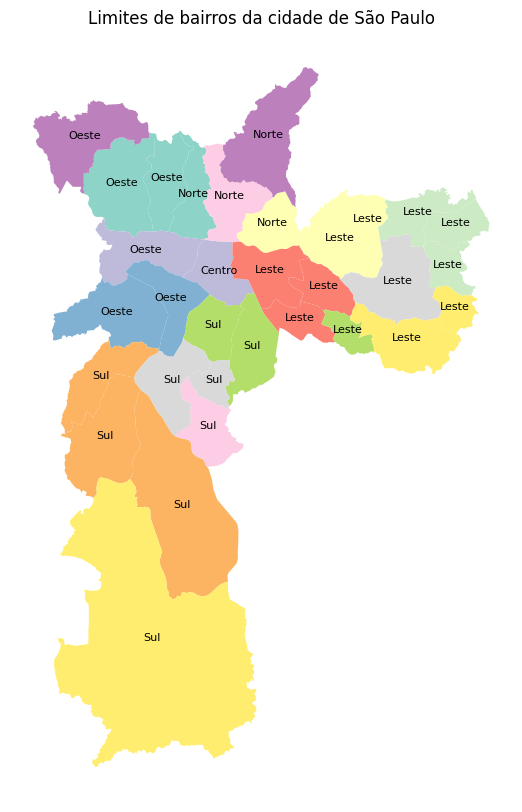

In [34]:
# caminho para o arquivo shapefile
shapefile_path = 'SAD69-96_SHP_subprefeitura_polygon.shp'

# ler o shapefile com geopandas
df_zonas = gpd.read_file(shapefile_path)

# plotar a camada desejada
ax = df_zonas.plot(column='geometry', cmap='Set3', figsize=(10, 10))

# adicionar título e legenda
ax.set_title('Limites de bairros da cidade de São Paulo')
ax.set_axis_off()
leg = ax.get_legend()

# iterar sobre as linhas do DataFrame e adicionar o rótulo para cada polígono
zonas = {
    25: "Norte", 20: "Norte", 3: "Norte", 2: "Norte",
    17: "Sul", 18: "Sul", 13: "Sul", 21: "Sul", 22: "Sul", 14: "Sul", 19: "Sul", 31: "Sul", 15: "Sul",
    8: "Leste", 9: "Leste", 10: "Leste", 4: "Leste", 5: "Leste", 16: "Leste", 23: "Leste", 29: "Leste", 30: "Leste", 28: "Leste", 26: "Leste", 27: "Leste",
    0: "Oeste", 1: "Oeste",  24: "Oeste", 6: "Oeste", 11: "Oeste", 12: "Oeste",
    7: "Centro"
    }

df_zonas['ZonaSP'] = ''
for index, row in df_zonas.iterrows():
    ax.annotate(text=zonas[index], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)
    df_zonas.loc[index, 'ZonaSP'] = zonas[index]
    

In [35]:
# atribuir zonas  
for index, row in df5.iterrows():
  lat_utm, lont_utm, zone, zone_l = utm.from_latlon(row['latitude'], row['longitude'])

  # criar um ponto com as coordenadas do seu ponto
  ponto = Point(lat_utm, lont_utm)

  # identificar a zona em que o ponto está
  selecao = df_zonas.contains(ponto)

  if selecao.any():      zona = df_zonas[selecao]['ZonaSP'].iloc[0]
  else:
      zona = 'Outro'

  df5.loc[index, 'ZonaSP'] = zona

### Tratando os símbolos de preço

In [36]:
df5['price'].value_counts()

$$                3183
$                  892
$$$                572
££                 128
$$$$                86
£                   34
£££                 27
€€                  17
₹₹                   6
€€€                  5
££££                 3
€€€€                 1
IRR 11,863,379       1
$34                  1
Name: price, dtype: int64

In [37]:
df5['price'] = df5['price'].replace(['££'], '$$')
df5['price'] = df5['price'].replace(['€€'], '$$')
df5['price'] = df5['price'].replace(['₹₹'], '$$')
df5['price'] = df5['price'].replace(['₹'], '$')
df5['price'] = df5['price'].replace(['RR'], '$$')
df5['price'] = df5['price'].replace(['£'], '$')
df5['price'] = df5['price'].replace(['€'], '$')
df5['price'] = df5['price'].replace(['£££'], '$$$')
df5['price'] = df5['price'].replace(['€€€'], '$$$')
df5['price'] = df5['price'].replace(['₹₹₹₹'], '$$$$')
df5['price'] = df5['price'].replace(['€€€€'], '$$$$')
df5['price']=df5['price'].str.strip()
df5 = df5.query('price != "IRR\xa011,863,379"')
df5 = df5.query('price != "$34"')
df5 = df5.query('price != "R"')
df5 = df5.query('price != "$92"')
df5 = df5.query('price != "$377"')

### Convertendo as variáveis de serviços oferecidos pelo restaurante para binário

In [38]:
df5['dine_in'] = df5['dine_in'].astype(int)
df5['takeout'] = df5['takeout'].astype(int)
df5['delivery'] = df5['delivery'].astype(int)
df5['drive_through'] = df5['drive_through'].astype(int)

In [39]:
df5.dine_in.value_counts()

1    7858
0     826
Name: dine_in, dtype: int64

### Inserindo valores nulos de avaliações de restaurantes de acordo com a mediana de cada tipo de restaurante

In [40]:
df5['rating'] = df5.groupby(['type'])['rating'].apply(lambda x: x.fillna(x.median()))

<ipython-input-40-eea9485aebeb>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df5['rating'] = df5.groupby(['type'])['rating'].apply(lambda x: x.fillna(x.median()))


### Normalizando features contínuas

In [41]:
le = LabelEncoder()
df5['price'] = le.fit_transform(df5['price'])
df5['sunday'] =le.fit_transform(df5['sunday'])
df5['monday'] =le.fit_transform(df5['monday'])
df5['tuesday'] =le.fit_transform(df5['tuesday'])
df5['wednesday'] = le.fit_transform(df5['wednesday'])
df5['thursday'] = le.fit_transform(df5['thursday'])
df5['friday'] = le.fit_transform(df5['friday'])
df5['saturday'] = le.fit_transform(df5['saturday'])

In [42]:
df5['price'].value_counts()

5    3730
1    3334
0     926
2     604
3      87
4       3
Name: price, dtype: int64

In [43]:
df5['sunday'].value_counts()

1    6143
0    2541
Name: sunday, dtype: int64

### Misturando variaveis continuas e categórica

#### preço médio por zona

In [44]:
df_preco_medio_zona = df5.groupby(['ZonaSP'], as_index=False).agg({'price':'mean'})
df_preco_medio_zona.rename(columns={'price': 'mean_price_zona'}, inplace=True)

# Normalização L2
df_preco_medio_zona.mean_price_zona = df_preco_medio_zona.mean_price_zona / np.sqrt(np.sum(df_preco_medio_zona.mean_price_zona**2))
df5 = df5.merge(df_preco_medio_zona, on='ZonaSP', how='left')

In [45]:
df_preco_medio_zona

,ZonaSP,mean_price_zona
0,Centro,0.407516
1,Leste,0.385980
2,Norte,0.462910
3,Oeste,0.425406
4,Outro,0.348082
5,Sul,0.410528


#### nota média por tipo do restaurante

In [46]:
# qntd de reviews por categoria
rieviews_cat = df5.groupby(['type'], as_index=False).agg({'reviews':'mean'})
rieviews_cat.rename(columns={'reviews': 'mean_review_type'}, inplace=True)

# Normalização L2
rieviews_cat.mean_review_type = rieviews_cat.mean_review_type / np.sqrt(np.sum(rieviews_cat.mean_review_type**2))

df5 = df5.merge(rieviews_cat, on='type', how='left')

### Criação de variáveis dummy para:
- Tipo de restaurante
- Horário de abertura e encerramento de expediente

In [47]:
df_dummy = pd.get_dummies(df5, columns = ['type','inicio_periodo','fim_periodo', 'ZonaSP'])
df_dummy

,title_x,place_id,data_id,data_cid,rating,reviews,price,address,latitude,longitude,open_state,description,thumbnail,title_y,sunday,monday,tuesday,wednesday,thursday,friday,saturday,inicio,fim,aberto_dia_util(%),aberto_final_de_semana(%),madrugada,manha,tarde,noite,title,dine_in,takeout,delivery,drive_through,freq,mean_price_zona,mean_review_type,type_bakery,type_bar,type_barbecue restaurant,type_brazilian restaurant,type_buffet restaurant,type_candy store,type_coffee shop,type_fast food restaurant,type_french restaurant,type_health food restaurant,type_ice cream shop,type_italian restaurant,type_japanese restaurant,type_juice shop,type_korean restaurant,type_mexican restaurant,type_middle eastern restaurant,type_night club,type_pizza restaurant,type_portuguese restaurant,type_restaurant,type_seafood restaurant,inicio_periodo_madrugada,inicio_periodo_manha,inicio_periodo_noite,inicio_periodo_tarde,fim_periodo_madrugada,fim_periodo_manha,fim_periodo_noite,fim_periodo_tarde,ZonaSP_Centro,ZonaSP_Leste,ZonaSP_Norte,ZonaSP_Oeste,ZonaSP_Outro,ZonaSP_Sul
0,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs,0x94ce5393313c4d53:0xb45e97dbf6c3aa6,812312034101967526,4.6,14.0,5,"Estr. do Campo Limpo, 992 - Vila Prel, São Pau...",-23.647919,-46.762998,Open ⋅ Closes 8 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipO1TL...,Sagrado Almoço,0,1,1,1,1,1,1,8.0,20.0,100.0,66.7,0.0,66.0,100.0,17.0,Sagrado Almoço,1,1,0,0,0.217361,0.410528,0.163770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,2 L's Restaurante E Bar Almoço-Lanches,ChIJU4W1hWVezpQRb7UZOCXHQNk,0x94ce5e6585b58553:0xd940c7253819b56f,15654731267408770415,4.6,17.0,5,"Rua Coronel Marques, 399 - Vila Nova Mancheste...",-23.543091,-46.545526,Opens soon ⋅ 11:30 am,NaN,https://streetviewpixels-pa.googleapis.com/v1/...,2 L's Restaurante E Bar Almoço-Lanches,0,1,1,1,1,1,1,11.5,14.5,100.0,66.7,0.0,7.0,36.0,0.0,2 L's Restaurante E Bar Almoço-Lanches,1,1,1,0,0.217361,0.385980,0.163770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,Brasiliano Restaurante,ChIJhbffCo6KxZQREb1Ryt2u80Y,0x94c58a8e0adfb785:0x46f3aeddca51bd11,5112622269601004817,4.5,881.0,0,"Av. Prof. Arthur Fonseca, 841 - Jardim Faculda...",-23.515907,-47.463541,Open ⋅ Closes 2:30 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipP11R...,Brasiliano Restaurante,0,1,1,1,1,1,1,11.0,14.5,100.0,66.7,0.0,15.0,36.0,0.0,Brasiliano Restaurante,1,1,0,0,0.032466,0.348082,0.149808,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,Sirva-se Almoço,ChIJzfUSXO74zpQRhxWMHFXJ9-8,0x94cef8ee5c12f5cd:0xeff7c9551c8c1587,17291510661700654471,4.5,201.0,5,"R. Conselheiro Ribas, 330 - Vila Anastácio, Sã...",-23.514702,-46.720743,Closed ⋅ Opens 11 am Mon,NaN,https://lh5.googleusercontent.com/p/AF1QipOzyq...,Sirva-se Almoço,0,1,1,1,1,1,0,11.0,15.0,100.0,33.3,0.0,15.0,43.0,0.0,Sirva-se Almoço,1,1,1,0,0.032466,0.425406,0.149808,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,Speed Almoço,ChIJR5o7uexWzpQR4NL-w4Fybvg,0x94ce56ecb93b9a47:0xf86e7281c3fed2e0,17901371470508905184,4.5,26.0,5,"Rua Dr. SÍlvio Dante Bertacchi, 253 - Vila Son...",-23.596165,-46.729929,Open ⋅ Closes 10 pm,NaN,https://lh5.googleusercontent.com/p/AF1QipMMLu...,Speed Almoço,0,1,1,1,1,1,1,11.0,22.0,100.0,66.7,0.0,15.0,100.0,51.0,Speed Almoço,1,1,0,0,0.217361,0.425406,0.163770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,Estação do Ó,ChIJUz1MDf75zpQR6AK3lgRZK2I,0x94cef9fe0d4c3d53:0x622b590496b702e8,7073845515958813416,4.8,35.0,5,"R. Antônio da Cunha Coelho, 190 - Freguesia do...",-23.494646,-46.708050,Open ⋅ Closes 12 am,NaN,https://lh5.googleusercontent.com/p/AF1QipNqh7...,Estação do Ó

### Modelagem
#### Dropando colunas que não serão necessárias para o modelo

In [48]:
df_modelo = df_dummy.drop(['open_state',
       'description', 'thumbnail', 'title_y', 'sunday', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'title','title_x','data_id','data_cid','address',
                     'place_id','reviews','inicio_periodo_noite','latitude','longitude'],axis=1)

In [49]:
#Checagem de valores nulos
df_modelo.isna().sum()

rating                              0
price                               0
inicio                            553
fim                               573
aberto_dia_util(%)                  0
aberto_final_de_semana(%)           0
madrugada                           0
manha                               0
tarde                               0
noite                               0
dine_in                             0
takeout                             0
delivery                            0
drive_through                       0
freq                                0
mean_price_zona                     0
mean_review_type                    0
type_bakery                         0
type_bar                            0
type_barbecue restaurant            0
type_brazilian restaurant           0
type_buffet restaurant              0
type_candy store                    0
type_coffee shop                    0
type_fast food restaurant           0
type_french restaurant              0
type_health 

In [50]:
#Remoção de valores nulos
df_modelo=df_modelo.dropna()

### Normalizando o dataframe e aplicando o TSNE para redução de dimensionalidade e facilitação de visão dos clusters

In [51]:
scaler1 = StandardScaler().fit(df_modelo).transform(df_modelo)
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(df_modelo)

### KMeans
Breve testagem com 100 clusters para verificar o quanto a inércia diminui a cada cluster. É possível notar que ela diminui devagar e que o `cotovelo` não é saliente. Isso nos mostra que, para nosso problema, não há muito `ganho de informação`de um cluster para outro. Por isso, usaremos um outro método para definir o número ótimo de clusters.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Elbow curve')

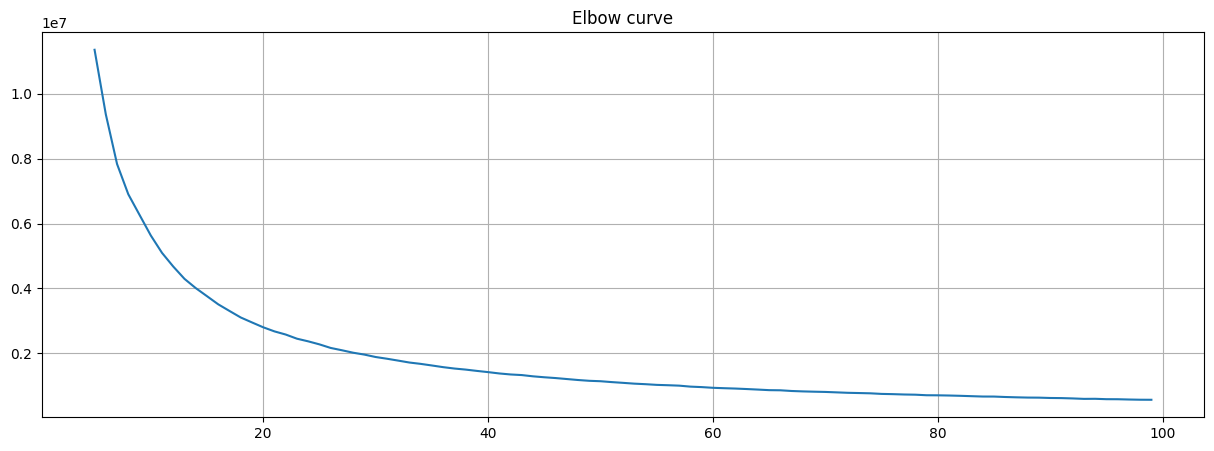

In [52]:
vals = []
for k in range(5, 100):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tsne)
    vals.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(5, 100), vals)
plt.grid(True)
plt.title('Elbow curve')

Testando novamente com um número reduzido de clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Elbow curve')

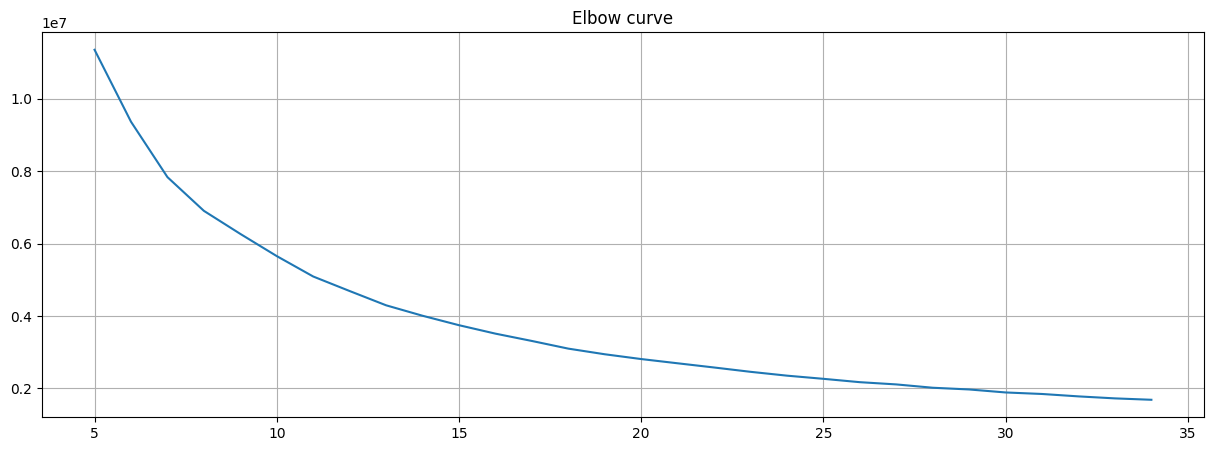

In [53]:
vals = []
for k in range(5, 35):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tsne)
    vals.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(5, 35), vals)
plt.grid(True)
plt.title('Elbow curve')

Usamos o método de `Silhouette Score` para entender o ganho de informação de um cluster para outro. Notamos que 6 clusters tem o maior ganho de informação. Todavia, 6 cluster é um número muito pequeno para generalizar 26 categorias de restaurante. Por isso, iremos usar os scores de cada cluster para avaliá-los de outra forma abaixo.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

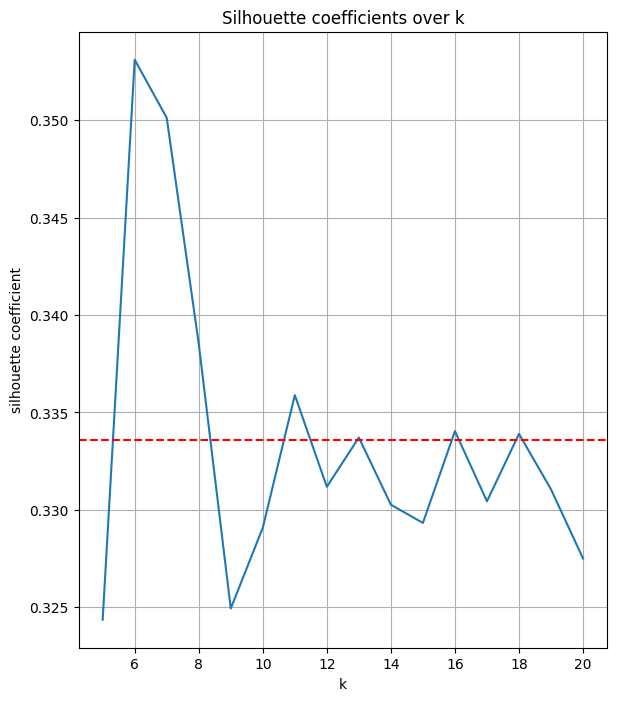

In [54]:
silhouette_plot = []
for k in range(5, 21):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(tsne)
    silhouette_avg =silhouette_score(tsne, cluster_labels)
    silhouette_plot.append(silhouette_avg)
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(5, 21), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [55]:
silhouette_plot

[0.3243617,
 0.3531105,
 0.3501273,
 0.3385256,
 0.32493547,
 0.32908574,
 0.33589044,
 0.3311872,
 0.33371583,
 0.3302641,
 0.32933232,
 0.33404398,
 0.3304419,
 0.33390227,
 0.33105347,
 0.32750574]

### Modelagem KMeans para 16 clusters

In [56]:
km= KMeans(n_clusters=16, random_state=42).fit(tsne)
cluster = km.labels_
centroids = km.cluster_centers_
score = silhouette_score(tsne, km.labels_, metric='euclidean')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


O score da silhueta varia de -1 a 1. `1` sendo que o cluster foi "corretamente" associado ao seu devido cluster, `0` significa que ele está muito próximo a outro cluster e `-1` significa que ele foi "incorretamente" associado. Nosso score, com K=16, é de 0.33. Acima de 0, mas abaixo de -1(O que é impossível de ser atingido)

In [57]:
score

0.3348123

### Visualização de como os 16 clusters estão dispersos em 2-D com TSNE

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


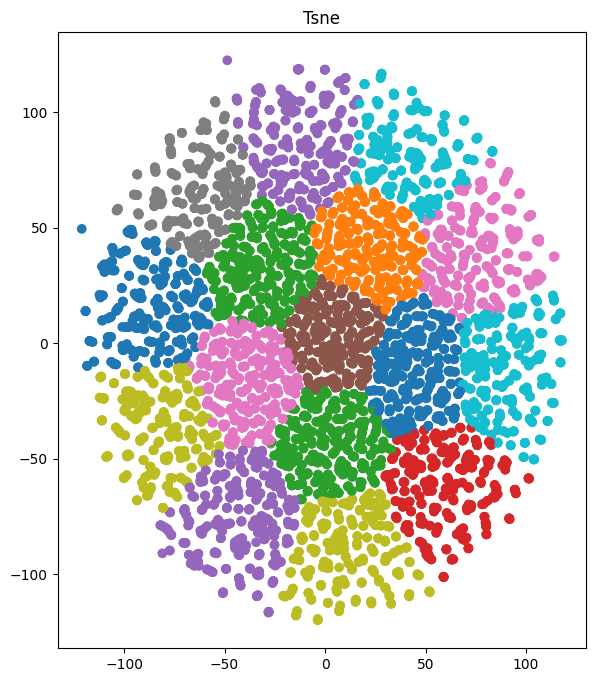

In [58]:
km_neat = KMeans(n_clusters=16, random_state=42).fit_predict(tsne)
cmap = 'tab10'
plt.figure(figsize=(15,8))
plt.subplot(121, title='Tsne')
plt.scatter(tsne[:,0], tsne[:,1], c=km_neat, cmap=cmap)

### Agrupamento Hierárquico
Acabou não se tornando o modelo mais ideal para nossa segmentação. Ele generaliza mais, como podem ver abaixo no dendograma. Em teoria, a altura maior do dendograma definiria o número de clusters ideais para nosso modelo. Todavia, essa linha sempre se mostra inferior a 8. Como mencionamos antes, é um número baixo para nossa segmentação. Caso fossemos usar esse algoritmo, teríamos que escolher alturas menores.

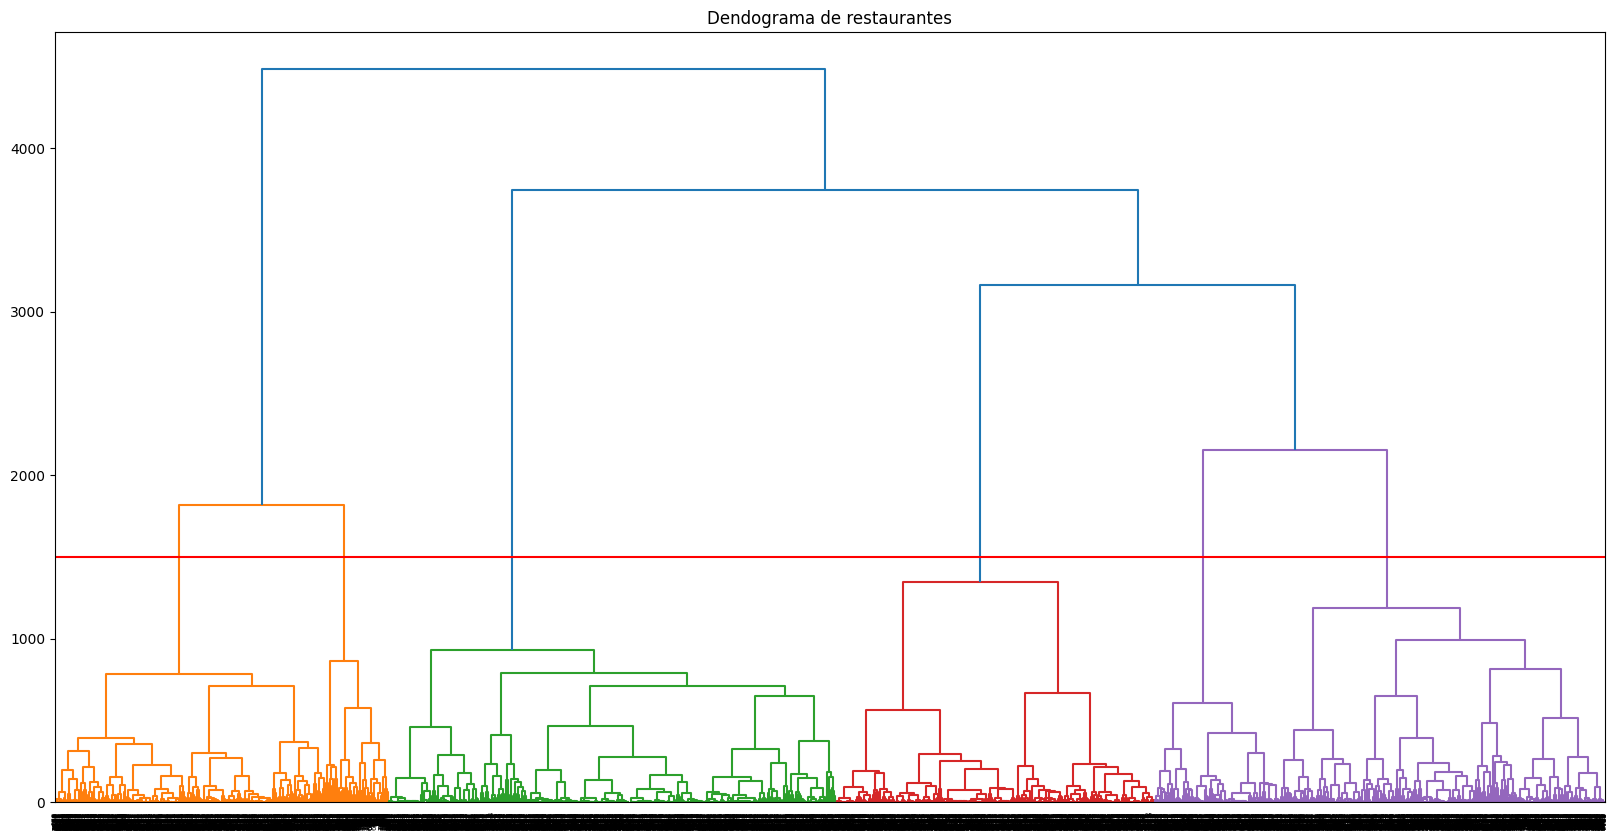

In [59]:
plt.figure(figsize=(20, 10))
plt.title("Dendograma de restaurantes")
clusters = shc.linkage(df_modelo, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 1500, color = 'r', linestyle = '-')
#6 ou 7

### Análise pós primeira modelagem
Adicionando o label e o nome do restaurante dos clusters ao dataframe do modelo.

In [60]:
df_modelo['Cluster'] = cluster
#pegar o cluster e adicionar a base
#adicionar o nome do lugar para entender a qual cluster cada um foi colcoado
df_modelo['Nome_Restaurante'] = df5['title_x']
df_modelo['place_id'] = df5['place_id']

#### Analisando resultados

In [61]:
cluster = df_modelo.loc[df_modelo['Cluster'] == 5]
cluster

,rating,price,inicio,fim,aberto_dia_util(%),aberto_final_de_semana(%),madrugada,manha,tarde,noite,dine_in,takeout,delivery,drive_through,freq,mean_price_zona,mean_review_type,type_bakery,type_bar,type_barbecue restaurant,type_brazilian restaurant,type_buffet restaurant,type_candy store,type_coffee shop,type_fast food restaurant,type_french restaurant,type_health food restaurant,type_ice cream shop,type_italian restaurant,type_japanese restaurant,type_juice shop,type_korean restaurant,type_mexican restaurant,type_middle eastern restaurant,type_night club,type_pizza restaurant,type_portuguese restaurant,type_restaurant,type_seafood restaurant,inicio_periodo_madrugada,inicio_periodo_manha,inicio_periodo_tarde,fim_periodo_madrugada,fim_periodo_manha,fim_periodo_noite,fim_periodo_tarde,ZonaSP_Centro,ZonaSP_Leste,ZonaSP_Norte,ZonaSP_Oeste,ZonaSP_Outro,ZonaSP_Sul,Cluster,Nome_Restaurante,place_id
0,4.6,5,8.00,20.0,100.0,66.7,0.0,66.0,100.0,17.0,1,1,0,0,0.217361,0.410528,0.163770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,5,Sagrado Almoço,ChIJU008MZNTzpQRpjpsv33pRQs
24,4.4,1,11.00,15.0,100.0,100.0,0.0,15.0,43.0,0.0,1,1,0,0,0.032466,0.348082,0.149808,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,5,Restaurante & Cervejaria Urbano's,ChIJ-YH8OD-VpgAR90cCB_MtKWw
25,4.8,5,8.00,20.0,100.0,66.7,0.0,66.0,100.0,17.0,1,1,0,0,0.217361,0.425406,0.163770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,5,Ripito,ChIJlU0P1eFXzpQRmBB7JycdaS0
76,4.7,1,11.50,14.5,75.0,66.7,0.0,7.0,36.0,0.0,1,1,0,0,0.024752,0.407516,0.188677,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,5,Mugui,ChIJZW9ooKlZzpQRpE2_1q2Udcs
92,4.3,1,12.00,23.0,75.0,100.0,0.0,0.0,100.0,68.0,1,1,0,0,0.010937,0.410528,0.177601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,5,Tenda Árabe,ChIJ8fhlMelbzpQROHh5INSx6uY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,4.9,5,11.75,15.0,75.0,66.7,0.0,3.0,43.0,0.0,1,1,0,0,0.117430,0.425406,0.282002,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,5,Pedroas Hamburgueria- Freguesia Do Ó,ChIJEzKXhMT5zpQRrfNE9e7i85w
8616,4.7,5,15.00,23.0,75.0,100.0,0.0,0.0,57.0,68.0,0,0,1,0,0.140226,0.425406,0.146584,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,5,Quintal do Ó,ChIJ-XmVJqL5zpQRJgXyPDE2Xtc
8649,4.4,1,17.00,24.5,0.0,100.0,0.0,0.0,28.0,93.0,1,1,0,0,0.140226,0.425406,0.146584,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,5,Bar'Baridade,ChIJ00zLXE74zpQRglAPOVseqrw
8653,4.4,1,17.00,5.0,50.0,100.0,0.0,0.0,28.0,85.0,1,0,0,0,0.140226,0.425406,0.146584,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,5,Tô a Toa d,ChIJl2dfR0f4zpQRQWXv4y_uxuo


In [62]:
result = df_modelo.groupby('Cluster').agg({'rating':'mean','dine_in':'sum', 'takeout':'sum', 'delivery':'sum',
       'drive_through':'sum', 'type_bakery':'sum', 'type_bar':'sum', 'type_barbecue restaurant':'sum',
       'type_brazilian restaurant':'sum', 'type_buffet restaurant':'sum',
       'type_candy store':'sum', 'type_coffee shop':'sum', 'type_fast food restaurant':'sum',
       'type_french restaurant':'sum', 'type_health food restaurant':'sum',
       'type_ice cream shop':'sum', 'type_italian restaurant':'sum',
       'type_japanese restaurant':'sum', 'type_juice shop':'sum', 'type_korean restaurant':'sum',
       'type_mexican restaurant':'sum', 'type_middle eastern restaurant':'sum',
       'type_night club':'sum','type_pizza restaurant':'sum','type_portuguese restaurant':'sum',
        'type_restaurant':'sum','type_seafood restaurant':'sum','inicio_periodo_madrugada':'sum',
        'inicio_periodo_manha':'sum', 'inicio_periodo_tarde':'sum',
        'fim_periodo_madrugada':'sum', 'fim_periodo_manha':'sum','fim_periodo_tarde':'sum',
        'fim_periodo_noite':'sum'})
result

,rating,dine_in,takeout,delivery,drive_through,type_bakery,type_bar,type_barbecue restaurant,type_brazilian restaurant,type_buffet restaurant,type_candy store,type_coffee shop,type_fast food restaurant,type_french restaurant,type_health food restaurant,type_ice cream shop,type_italian restaurant,type_japanese restaurant,type_juice shop,type_korean restaurant,type_mexican restaurant,type_middle eastern restaurant,type_night club,type_pizza restaurant,type_portuguese restaurant,type_restaurant,type_seafood restaurant,inicio_periodo_madrugada,inicio_periodo_manha,inicio_periodo_tarde,fim_periodo_madrugada,fim_periodo_manha,fim_periodo_tarde,fim_periodo_noite
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.387522,532,490,101,25,33,54,55,39,27,16,4,79,2,20,14,14,25,9,3,5,11,1,23,0,128,3,24,466,54,60,6,226,273
1,4.425000,458,405,88,19,39,60,20,24,41,16,4,60,9,15,23,26,10,8,3,6,4,2,51,1,75,3,0,260,240,72,2,183,243
2,4.466334,514,498,82,9,26,75,16,40,17,12,6,60,8,13,13,32,38,7,2,7,16,1,44,2,115,1,4,298,241,21,0,238,292
3,4.447150,515,471,114,16,70,78,43,43,29,22,13,33,2,13,42,16,4,3,0,6,3,5,24,0,128,2,15,327,231,65,11,205,298
4,4.433821,538,461,118,20,31,109,20,33,3,6,5,84,3,10,42,19,13,8,1,14,12,16,20,1,124,7,0,303,231,38,9,68,466
5,4.385135,472,448,79,12,48,84,43,35,21,10,2,61,3,10,6,20,8,9,0,7,6,5,22,4,111,3,0,386,106,71,4,172,271
6,4.437452,507,473,57,5,78,66,35,47,28,13,0,34,1,8,9,20,8,4,2,2,7,7,19,6,121,11,5,420,83,86,2,255,183
7,4.448303,441,380,95,6,61,114,12,10,6,19,1,57,3,13,14,9,18,5,2,7,2,33,46,1,67,1,0,210,218,98,12,132,259
8,4.445648,459,408,101,5,40,56,13,28,7,20,2,56,7,9,24,22,13,12,7,4,4,33,17,5,133,5,0,230,234,54,21,113,329


In [63]:
#Adicionando de volta as colunas para colocar no dashboard completo
df_modelo['type'] = df5['type']
df_modelo['address'] = df5['address']
df_modelo['latitute'] = df5['latitude']
df_modelo['longitude'] = df5['longitude']

In [64]:
# #Caso formos fazer uma pipeline e depois salver
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
# steps = [('scaler', StandardScaler()),
#          ('tsne', TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)),
#          ('clustering', KMeans())]
# pipeline = Pipeline(steps)
# import joblib
# joblib.dump(pipeline, 'my_pipeline.joblib')
# new_data = pd.read_csv('nome_novos_dados_se_tiver.csv',index_col=0)
# loaded_pipeline = joblib.load('my_pipeline.joblib')
# predicted_cluster = loaded_pipeline.predict(new_data)

In [65]:
df_geral_db = df5[['title', 'place_id', 'rating', 'reviews',
       'price', 'type', 'ZonaSP', 'address', 'latitude', 'longitude', 'open_state',
       'description', 'thumbnail', 'sunday', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'inicio', 'fim',
       'aberto_dia_util(%)', 'aberto_final_de_semana(%)', 'madrugada', 'manha',
       'tarde', 'noite', 'inicio_periodo', 'fim_periodo', 'dine_in',
       'takeout', 'delivery', 'drive_through']]

df_geral_db = df_geral_db.merge(df_modelo[['place_id',  'Cluster']], how='left', on='place_id' )

In [66]:
# Já está incluso nos arquivos do repositório do Git Hub, mas pode baixar novamente tirando a #
df_geral_db.to_csv('df_geral_db.csv', index=False)

<a id="ancora5"></a>
## <b> 5. Modelo de NPL com Análise de sentimento </b> 

O modelo de NLP (Processamento de Linguagem Natural) que analisa os sentimentos das avaliações de diversos estabelecimentos é uma técnica de análise de dados que utiliza algoritmos de aprendizado de máquina para compreender o tom e o contexto das avaliações deixadas pelos clientes na plataforma do Google.

Ao analisar as avaliações dos clientes, o modelo de NLP pode identificar tendências e padrões nos sentimentos expressos pelos clientes, permitindo que as empresas e usuários obtenham insights valiosos sobre o desempenho de seus estabelecimentos e serviços.

Em resumo, o modelo de NLP que analisa os sentimentos das avaliações de diversos estabelecimentos é uma técnica poderosa de análise de dados que pode fornecer informações valiosas, em nosso caso mais para clientes que podem utilizar das análises para observar a verdadeira opinião além das notas/estrelas, comparadas também a categorias e avaliações.

### Bibliotecas

In [105]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from numba import jit, prange, njit
import time
# from deep_translator import GoogleTranslator, single_detection

from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer

# download de stopwords de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Pré Processamento
Antes de analisar os sentimentos de cada restaurante, devemos filtrar e limpar os datasets que iremos usar

In [98]:
#Limpeza de dados
df = pd.read_csv('most_relevant_reviews.csv',sep = ',', usecols=['title', 'place_id', 'username', 'rating', 'description', 'date'])
df

,title,place_id,username,rating,description,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4331,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,André Marques,5,NaN,a month ago
4332,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Richard Lucas,4,NaN,7 months ago
4333,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Iago Vilas Boas,4,NaN,2 months ago
4334,Villares Lounge Club,ChIJV1wC_1j3zpQRCrOgpy20cOI,Denis Balduino,5,NaN,3 weeks ago


In [99]:
#Organizar o dataset 
df = df.rename(columns={"title":"restaurante"})
df = df.rename(columns={"description":"comentario"})
df = df.dropna().reset_index(drop=True)
df

,restaurante,place_id,username,rating,comentario,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4224,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Balatonfüredi Dávid,5,Best pastel in town! O maior é mais recheado!...,3 months ago
4225,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,João Carlos Sousa,5,"Simpática e prestativa, Rose faz pastéis na ho...",7 months ago
4226,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Isabela Pontes,5,"Meu deus, o pastel é sensaaacional se bom. Mas...",9 months ago
4227,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Henrique Costa (Silva),5,Sem duvidas o melhor pastel da cidade!! Além d...,a year ago


In [100]:
# traduzindo dados para inglês, usando computação paralela
@jit(parallel=True)
def traduzir_comentarios(comentarios):
  translated_list = []
  my_translator = GoogleTranslator(source='auto', target='english')

  for c in prange(len(comentarios)):
    result = my_translator.translate(text=str(comentarios[c]))
    translated_list.append(result)  
  return translated_list

In [106]:
tempo_inicial = time.time()
df['comentario'] = traduzir_comentarios(df.comentario.values)
tempo_final = time.time()
print(f"A duração da tradução foi de {tempo_final - tempo_inicial} segundos")

A duração da tradução foi de 13 segundos


In [ ]:
#salvando no csv
df.to_csv('most_relevant_reviews_translated.csv', index=False)

### Remover os stopwords

In [73]:
df = pd.read_csv('most_relevant_reviews_translated.csv',sep=',')
df

,restaurante,place_id,username,rating,comentario,date
0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Vanessa Scott,5,"Very chill and hipster, cool place! Came here ...",a month ago
1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Pedro Henrique Fernandes,5,"Superb coffee shop in São Paulo, easily one of...",3 months ago
2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Caio Cruz,5,Really cool atmosphere plus good cakes and cof...,9 months ago
3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Sebastian HH,5,Super nice cafe !\nDelicious coffee and sandwi...,a month ago
4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,Rachel B,5,Super enjoyed this place! We came in passing w...,4 years ago
...,...,...,...,...,...,...
4224,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Balatonfüredi Dávid,5,Best pastel in town! The bigger one is more st...,3 months ago
4225,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,João Carlos Sousa,5,"Friendly and helpful, Rose makes pastries on t...",7 months ago
4226,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Isabela Pontes,5,"My god, the pastel is sensational if good. Dry...",9 months ago
4227,Pastel da Rose,ChIJsUvtjMRZzpQRIV9yNjTkbUE,Henrique Costa (Silva),5,Without a doubt the best pastel in town!! In a...,a year ago


In [74]:
# Criando DataFrames vazios para armazenar pontuações de polaridade de sentimento e frequencias de palavras
sentimento_df = pd.DataFrame(columns=['restaurante', 'comentario', 'polaridade'])
freq_df = pd.DataFrame(columns=['restaurante', 'palavra', 'frequencia'])

In [75]:
# Para cada avaliação de restaurante, análisamos a polaridade de sentimentos e a estatísticas de frequência de palavras
for restaurante in df['restaurante'].unique():
    reviews = df.loc[df['restaurante'] == restaurante, 'comentario']
    
    words = []
    # analise de sentimento
    for comentario in reviews:
        # Tokenização de texto e exclusão de stopword
        review_str = str(comentario)
        tokens = nltk.word_tokenize(review_str.lower())

        # calculando polaridade
        blob = TextBlob(' '.join(tokens))
        polaridade = blob.sentiment.polarity
        
        # Adicionando pontuações de polaridade de sentimento no DataFrame "sentimento_df"
        sentimento_df = sentimento_df.append({
            'restaurante': restaurante,
            'comentario': comentario,
            'polaridade': polaridade
        }, ignore_index=True)

        #estrutura de repetição para exclusão de stopwords em portugues e ingles
        linguagens = ['english', 'portuguese']
        tokens_freq = tokens.copy()
        for l in linguagens:
            tokens_freq = [t for t in tokens_freq if t.isalpha() and t not in stopwords.words(l)]
        
        words += tokens_freq
    
    freq_dist = nltk.FreqDist(words)
    
    # Adicionando pontuações de polaridade de sentimento no DataFrame "freq_df"
    for palavra, frequencia in freq_dist.items():
        freq_df = freq_df.append({
            'restaurante': restaurante,
            'palavra': palavra,
            'frequencia': frequencia
        }, ignore_index=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append({
<ipython-input-75-549617062d0b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [76]:
sentimento_df['rating']=df['rating']
sentimento_df['place_id']=df['place_id']
sentimento_df

,restaurante,comentario,polaridade,rating,place_id
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA
...,...,...,...,...,...
4224,Pastel da Rose,Best pastel in town! The bigger one is more st...,0.562500,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4225,Pastel da Rose,"Friendly and helpful, Rose makes pastries on t...",0.458273,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4226,Pastel da Rose,"My god, the pastel is sensational if good. Dry...",0.469444,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE
4227,Pastel da Rose,Without a doubt the best pastel in town!! In a...,0.603704,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE


In [77]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
sentimento_df[['polaridade_num', 'polaridade_texto']] = sentimento_df['polaridade'].apply(polaridade).apply(pd.Series)
sentimento_df

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
...,...,...,...,...,...,...,...
4224,Pastel da Rose,Best pastel in town! The bigger one is more st...,0.562500,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4225,Pastel da Rose,"Friendly and helpful, Rose makes pastries on t...",0.458273,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4226,Pastel da Rose,"My god, the pastel is sensational if good. Dry...",0.469444,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo
4227,Pastel da Rose,Without a doubt the best pastel in town!! In a...,0.603704,5,ChIJsUvtjMRZzpQRIV9yNjTkbUE,1,Positivo


In [ ]:
# Salvando pontuações de polaridade de sentimento e frequências de palavras para um arquivo CSV
sentimento_df.to_csv('restaurant_polaridade.csv', index=False)
freq_df.to_csv('restaurant_word_freq.csv', index=False)

### Análise de sentimento

In [78]:
sent_restaurante = sentimento_df.copy()
sent_restaurante.head()

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
0,Por um Punhado de Dólares,"Very chill and hipster, cool place! Came here ...",0.510648,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
1,Por um Punhado de Dólares,"Superb coffee shop in São Paulo, easily one of...",0.257292,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
2,Por um Punhado de Dólares,Really cool atmosphere plus good cakes and cof...,0.258333,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
3,Por um Punhado de Dólares,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo
4,Por um Punhado de Dólares,Super enjoyed this place! We came in passing w...,0.530889,5,ChIJ08g_akxYzpQR0RO2V9l10wA,1,Positivo


In [79]:
#melhores restaurantes por meio de analise de sentimento 
top_ratings = sent_restaurante.sort_values(['polaridade','rating'], ascending=False)
top_ratings[:]

,restaurante,comentario,polaridade,rating,place_id,polaridade_num,polaridade_texto
62,Café Sol,Went there for coffee and a dessert. Everythin...,1.0,5,ChIJKY73HalZzpQR1ZE9JE8dzS0,1,Positivo
68,Um Coffee Co.,Awesome!!,1.0,5,ChIJgY-iHWZYzpQRUQ1dHiOh1IU,1,Positivo
79,Um Coffee Co.,Great service and coffee!,1.0,5,ChIJy_Nx8yVazpQRfS3c9meKjik,1,Positivo
155,Starbucks,Great service! And a delicious brigadeiro frap...,1.0,5,ChIJYdxZ6Z1XzpQRF6a4w5mWwzg,1,Positivo
177,the little coffee shop . CAFÉ ESPECIAL & CURSO...,"One of the best in São Paulo, no doubt. Great ...",1.0,5,ChIJLZAxhsdZzpQRqTokkP9PAKg,1,Positivo
...,...,...,...,...,...,...,...
3612,Bolo da Madre,"I had a terrible experience, my order was canc...",-1.0,5,ChIJMxUQOZtbzpQRMFfnopTnW0M,-1,Negativo
3932,Fábrica de Bolo Vó Alzira Bangu,"I bought a passion fruit cake, through Ifood, ...",-1.0,5,ChIJm2OcUOtYzpQRvQ0lNNaEdYQ,-1,Negativo
151,Starbucks,Terrible service.\nHad an argument with one of...,-1.0,4,ChIJgX_VHYNXzpQRBVLomhGDEjk,-1,Negativo
2577,Confeitaria e Panificadora Doce Belo,Just horrible this owner treats others as if t...,-1.0,4,ChIJecU9gcDNyJQRdLbIg_1Jeus,-1,Negativo


In [80]:
#Se estivermos preocupados com as avaliações totais de sentimento de diferentes restaurantes, podemos primeiro olhar para a média dessas avaliações do restaurante, aqui usamos o método pivot_table:
mean_ratings = sent_restaurante.pivot_table(values=['polaridade','rating'], index='restaurante',aggfunc='mean')
mean_ratings[:5]

,polaridade,rating
restaurante,,
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos,0.588156,4.375
89ºC Coffee Station,0.409069,4.000
@ Zona Norte,0.918333,3.500
A Baianeira,0.493646,4.625
A Bolaria,0.769018,5.000


In [81]:
#Vendo  estatísticas de cada restaurante e o número de votantes:
ratings_by_place = sent_restaurante.groupby('restaurante').size()
ratings_by_place[:10]

restaurante
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos    8
89ºC Coffee Station                                                                                                              8
@ Zona Norte                                                                                                                     2
A Baianeira                                                                                                                      8
A Bolaria                                                                                                                        7
A Casa do Porco Bar                                                                                                              8
A Creperia                                                                                                                       8
A Douceur Doces Finos                                                  

In [82]:
#Se o número de votantes for muito baixo, então esses dados não são objetivos, vamos selecionar restaurantes com mais de 4 votantes:
active_place = ratings_by_place.index[ratings_by_place >= 5]
active_place

Index([''Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos',
       '89ºC Coffee Station', 'A Baianeira', 'A Bolaria',
       'A Casa do Porco Bar', 'A Creperia',
       'A Imperatriz • Casa de Chá - Presentes - Terapias',
       'A Quinta do Marquês- Xodó Paulista',
       'A Refinaria Gourmet Unidade Vila Leopoldina',
       'ALTO DA MOOCA PÃES E DOCES',
       ...
       'YERBA + Por um Punhado de Dólares', 'ZUD Café', 'Zeu's Hot Dog',
       'Ziriguidum Bar', 'boteco Tamandaré', 'café paris', 'café zinn',
       'padaria', 'quilinho',
       'the little coffee shop . CAFÉ ESPECIAL & CURSOS . Delivery/retiradas agendadas, e workshop online p/ quem quer empreender.'],
      dtype='object', name='restaurante', length=492)

In [83]:
#media de ratings
mean_ratings = mean_ratings.loc[active_place]
mean_ratings

,polaridade,rating
restaurante,,
'Liderança MaxCoffee Quality | Locação E Venda De Máquinas De Café Expresso Profissional - Vending - Café TerraGrão - Eventos,0.588156,4.375
89ºC Coffee Station,0.409069,4.000
A Baianeira,0.493646,4.625
A Bolaria,0.769018,5.000
A Casa do Porco Bar,0.508805,4.750
...,...,...
café paris,0.427439,4.625
café zinn,0.362548,4.125
padaria,0.440074,4.000


In [84]:
#ordenando os 10 primeiros restaurantes por meio de rating
top_ratings = mean_ratings.sort_values(by='rating', ascending=False)
top_ratings[:10]

,polaridade,rating
restaurante,,
Pastel da Rose,0.508400,5.0
Spoleto,-0.061226,5.0
Nó 8 Café,0.401394,5.0
Brothaus Breads & Pastries,0.373607,5.0
Oggi Sorvetes,0.662490,5.0
Oggi Sorvetes - Vila Guarani,0.541944,5.0
Padaria Bella Paulista,0.325796,5.0
Padaria Brasileira,0.338835,5.0
Bar do Nico,0.489397,5.0


In [85]:
#ordenando os 10 primeiros restaurantes por meio de média de polaridade
top_ratings = mean_ratings.sort_values(by='polaridade', ascending=False)
top_ratings[:10]

,polaridade,rating
restaurante,,
A Bolaria,0.769018,5.000
Cafeteria São Paulo,0.742917,4.250
Tetê Confectionery Gelateria Cafe,0.724749,4.000
Farsoun Comida e Doces Árabe Sirio,0.718557,4.875
Actual - Máquinas De Café em São Paulo - Venda e Locação Máquinas de Café,0.703125,5.000
Abarista Cafés,0.693690,4.000
Do Digo Macarons e Chocolates,0.685147,4.250
The Francis Bolos e Doces,0.680933,4.625
Nakajyma Sushi Limão,0.679310,4.250


### Conclusão da Análise de Sentimento

O cálculo de polaridade e rating é diferente devido a polaridade foi calculada com base nas avaliações dos clientes e o rating foi baseado em critérios como qualidade da comida, serviço e ambiente, mostrado na output de frequência de palavras. Assim, é possível que a polaridade e o rating sejam opostos.
Então, a relação entre a polaridade e o rating pode variar de acordo com o contexto e as métricas específicas usadas para calcular cada um. Por isso, é difícil analisar por aqui, portanto, será mostrado mais explicativo no analise de frequência de palavras.

### Analise de frequências das palavras

In [86]:
top_ratings = freq_df.sort_values(['frequencia'], ascending=False)
top_ratings[:10]

,restaurante,palavra,frequencia
4928,The Coffee,coffee,99
4959,The Coffee,service,33
4961,The Coffee,place,24
4933,The Coffee,good,24
10829,Saint Decor Bistrô,place,20
44304,Casa de Bolos - Teodoro Sampaio 636 (PRÓXIMO A...,cake,20
15860,Le Pain Quotidien,good,20
674,Coffee Lab,coffee,19
4934,The Coffee,quality,19
5017,The Coffee,great,18


Digite o restaurante desejado: The Coffee


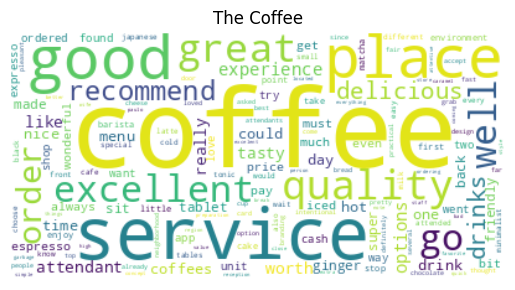

In [89]:
# Definir o nome do restaurante que você deseja analisar
restaurante = input(str('Digite o restaurante desejado: ')) #Nesse caso, peguei o restaurante com melhor polaridade

# Filtrar o DataFrame para selecionar apenas os dados do restaurante desejado
restaurante_df = freq_df[freq_df["restaurante"] == restaurante]

# Criar um dicionário com as palavras e suas frequências
palavras = dict(zip(restaurante_df["palavra"], restaurante_df["frequencia"]))

# Criar a nuvem de palavras
wordcloud = WordCloud(background_color="white").generate_from_frequencies(palavras)

# Mostrar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(restaurante)
plt.show()

### Conclusão de frequência de palavras 

É importante lembrar que as stopwords são palavras muito comuns e genéricas que geralmente não contribuem para a análise de sentimento, mas é possível que algumas stopwords sejam importantes para a análise dependendo do contexto.
Além disso, com o resultado acima, podemos analisar que a polaridade foi calculada com base de avaliações do atendimento e de comida, devido o aparecimento das palavras "atendimento"(serviço) ,"café"(comida) e "ótimo"(pode tanto ser comentário de comida quanto de serviço).

### Wordcloud de polaridade e de frequência:
para cada restaurante colocado no input, sai o output da polaridade e das palavras com mais frequência 

Digite o restaurante desejado: The Coffee
A polaridade média dos comentários do restaurante The Coffee é 0.38 (positiva).


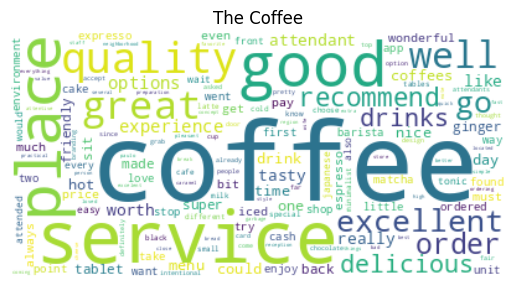

In [90]:
# Definir o nome do restaurante que você deseja analisar
restaurante = input(str('Digite o restaurante desejado: '))

# Filtrar o DataFrame para selecionar apenas os dados do restaurante desejado
restaurante_freq_df = freq_df[freq_df["restaurante"] == restaurante]
restaurante_sent_df = sent_restaurante[sent_restaurante["restaurante"] == restaurante]

# Calcular a média da polaridade dos comentários do restaurante
polaridade_media = restaurante_sent_df["polaridade"].mean()

# Exibir legenda da polaridade
if polaridade_media > 0:
    legenda_polaridade = 'positiva'
elif polaridade_media < 0:
    legenda_polaridade = 'negativa'
else:
    legenda_polaridade = 'neutra'

print(f'A polaridade média dos comentários do restaurante {restaurante} é {polaridade_media:.2f} ({legenda_polaridade}).')

# Criar um dicionário com as palavras e suas frequências
palavras = dict(zip(restaurante_freq_df["palavra"], restaurante_freq_df["frequencia"]))
wordcloud = WordCloud(background_color='white').generate_from_frequencies(palavras)

# Mostrar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(restaurante)
plt.show()

### Verificando se nossa análise de polaridade corresponde com as notas dadas aos estabelecimentos

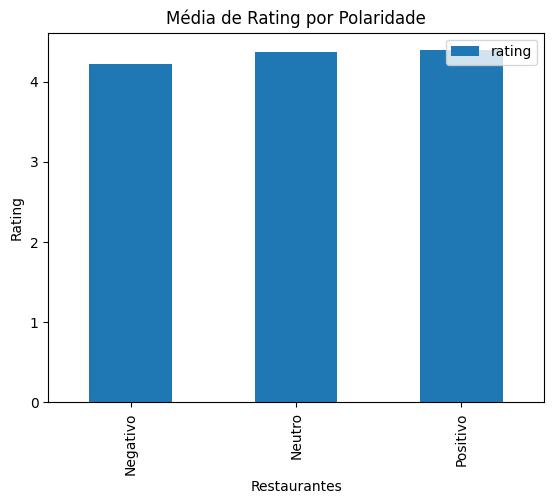

In [91]:
restaurant_sentiment = pd.read_csv('restaurant_polaridade.csv')
df = restaurant_sentiment.groupby('polaridade_texto').agg({'rating':'mean'})

# Plotar o gráfico de barras
df.plot(kind='bar')
plt.xlabel('Restaurantes')
plt.ylabel('Rating')
plt.title('Média de Rating por Polaridade')
plt.show()


Apesar da pouca variação entre as médias, a distribuição do gráfico mostra como a nossa análise de sentimentos está coerente com a realidade, visto que, comentários classificados por nós como negativos de fato apresentam a menor média de nota de avaliação (rating), já os neutros são melhores que os negativos mas ainda ficam atrás dos positivos, como esperávamos que acontecesse.

### Salvando Dados de Polaridade Média dos restaurantes

In [92]:
def summarize_text(text):
    # Transforma o texto em uma lista de frases
    sentences = text.split('. ')
    # Cria um objeto parser
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    # Gera o resumo selecionando as frases mais relevantes
    summarizer = LsaSummarizer()
    summarizer.stop_words = [' ']
    summary = summarizer(document=parser.document, sentences_count=2)

    # Retorna o resumo e as pontuações das frases
    return ' '.join(map(str, summary))

In [93]:
restaurant_polaridade_media = sentimento_df.groupby(['restaurante'], as_index=False).agg({'polaridade': 'mean', 'rating': 'mean'})
sentimento_df.fillna('', inplace=True)
restaurant_polaridade_media_comentarios = sentimento_df.groupby(['restaurante'], as_index=False)['comentario'].apply('. '.join).reset_index()
restaurant_polaridade_media_comentarios['ResumoTexto'] = restaurant_polaridade_media_comentarios['comentario'].apply(summarize_text)

/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5) is lower than number of sentences (7). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (2) is lower than number of sentences (8). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (3) is lower than number of sentences (7). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (2) is lower than number of sentences (9). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))
/usr/local/lib/python3.9/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5) 

In [94]:
restaurant_polaridade_media_comentarios = restaurant_polaridade_media_comentarios[['ResumoTexto', 'restaurante']]
restaurant_polaridade_media = restaurant_polaridade_media.merge(restaurant_polaridade_media_comentarios, how='left', on ='restaurante')
restaurant_polaridade_media[['polaridade_num', 'polaridade_texto']] = restaurant_polaridade_media['polaridade'].apply(polaridade).apply(pd.Series)

In [95]:
df_rest = pd.read_csv('most_relevant_reviews.csv',sep = ',', usecols=['title', 'place_id']).drop_duplicates()

restaurant_polaridade_media = restaurant_polaridade_media.merge(df_rest, right_on='title', left_on='restaurante', how='left')
restaurant_polaridade_media = restaurant_polaridade_media[['place_id', 'title', 'rating', 'polaridade', 'polaridade_num', 'polaridade_texto', 'ResumoTexto']]
restaurant_polaridade_media.to_csv("restaurant_polaridade_media.csv", index=False)

<a id="ancora6"></a>
## <b> 6. Banco de dados</b> 

A criação de um modelo relacional é de extrema importância para a estruturação de um banco de dados SQL. Isso porque um modelo relacional permite organizar os dados de maneira clara e eficiente, definindo as tabelas e os relacionamentos entre elas de forma lógica e coerente. Dessa forma, conseguimos garantir a integridade dos nossos dados, evitando redundâncias e inconsistências, e facilitar a consulta e a manipulação das informações armazenadas. 

Sendo assim construímos um modelo relacional, com uma tabela chamada "estabelecimento" que tem relacionamentos com outras tabelas como "PrincipaisPalavras", "Avaliações", "PolaridadeMedia", "Servicos", "FuncionamentoDias", "FuncionamentoHorarios" e "Localizacao". Indicando que estamos criando um banco de dados para armazenar informações sobre estabelecimentos.

Toda tabela tem a mesma cardinalidade (1,1) e (0,n), o que indica que um estabelecimento sempre haverá no máximo uma informação da tabela relacionada, porém a tabela relacionada pode não ter nenhum estabelecimento ou pode ter vários.

<a href="https://imgbox.com/n5MzCBFO" target="_blank"><img src="https://images2.imgbox.com/4f/4e/n5MzCBFO_o.jpeg" alt="image host"/></a>

## Unificando 

### Bibliotecas 

In [107]:
import pandas as pd
import re

### Funções 

In [108]:
def inicio_fim_to_hm(df):
  '''
  recebe um daframe com os horarios de funcionamento de cada dia e centraliza em apenas suas colunas o horario de abertura/fechamento.
  O dia escolhido para representar o horario de funcionamento majoritário é o primeiro que não estja fechado
  de acorodo com a ordem da lista 'dias_da_semana' (quase todos os restaurantes utilizam a sexta)
  '''
  for index, row in df.iterrows():
    inicio = str(float(row['inicio'])).split('.')
    fim = str(float(row['fim'])).split('.')
    try:
      df.loc[index, 'inicio'] = inicio[0]+ ':' + str(int(int(inicio[1])*6))[:2]
      df.loc[index, 'fim'] = fim[0]+ ':' + str(int(int(fim[1])*6))[:2]
    except:
      pass
  return df

### Todos os restaurantes

In [109]:
path='./'

In [110]:
df_overview = pd.read_csv(path+'df_geral_db.csv')

In [111]:
df_estabelecimento = df_overview[['title', 'place_id', 'Cluster', 'rating', 'reviews', 'price', 'type', 'thumbnail']]
df_estabelecimento.rename(columns={
    'title': 'Nome',
    'place_id': 'ID',
    'rating': 'NotaMedia',
    'reviews': 'QntdAvaliaçoes',
    'price': 'FaixaPreço',
    'type': 'Categoria',
    'thumbnail': 'Thumbnail'
}, inplace=True)

df_estabelecimento.to_csv(path+"Estabelecimento.csv", index=False)

<ipython-input-111-4c6ae4c0d5ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estabelecimento.rename(columns={


In [112]:
df_localizacao = df_overview[['place_id', 'ZonaSP',
       'address', 'latitude', 'longitude']]
df_localizacao.rename(columns={
    'place_id': 'Estabelecimento_ID',
    'address': 'Endereço',
    'latitude': 'Latitude',
    'longitude': 'Longitude'
}, inplace=True)

df_localizacao.to_csv(path+"Localizacao.csv", index=False)

<ipython-input-112-7a5918a47bf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localizacao.rename(columns={


In [113]:
df_funcionamentoHorarios = df_overview[['place_id', 'inicio', 'fim', 'madrugada', 'manha', 'tarde', 'noite', 'inicio_periodo', 'fim_periodo']]
df_funcionamentoHorarios.rename(columns={
    'place_id': 'Estabelecimento_ID'
}, inplace=True)

df_funcionamentoHorarios = inicio_fim_to_hm(df_funcionamentoHorarios)

df_funcionamentoHorarios.to_csv(path+"FuncionamentoHorarios.csv", index=False)

<ipython-input-113-fb7ee2c11aa7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_funcionamentoHorarios.rename(columns={


In [114]:
df_funcionamentoDias = df_overview[['place_id', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'aberto_dia_util(%)', 'aberto_final_de_semana(%)']]
df_funcionamentoDias.rename(columns={
    'place_id': 'Estabelecimento_ID',
    'aberto_dia_util(%)': 'aberto_dia_util',
    'aberto_final_de_semana(%)': 'aberto_final_de_semana'
}, inplace=True)

df_funcionamentoDias.to_csv(path+"FuncionamentoDias.csv", index=False)

<ipython-input-114-2727fc75cbd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_funcionamentoDias.rename(columns={


In [115]:
df_servico = df_overview[['place_id', 'dine_in', 'takeout', 'delivery', 'drive_through']]
df_servico.rename(columns={
    'place_id': 'Estabelecimento_ID'
}, inplace=True)

df_servico.to_csv(path+"Servico.csv", index=False)

<ipython-input-115-140a18538528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_servico.rename(columns={


### Apenas restaurantes com Reviews

In [116]:
most_relevant_reviews = pd.read_csv(path+'most_relevant_reviews.csv',
                                    usecols=['title', 'place_id', 'rating', 'date'])
most_relevant_reviews = most_relevant_reviews.reset_index().rename(columns={'index': 'review_id'})

most_relevant_reviews_translated = pd.read_csv(path+'restaurant_polaridade.csv',
                                               usecols=['place_id', 'comentario', 'polaridade',
                                                        'polaridade_texto', 'review_id'])
most_relevant_reviews = most_relevant_reviews.merge(most_relevant_reviews_translated, on=['review_id'],
                                                    how='left')


most_relevant_reviews.head()

,review_id,title,place_id_x,rating,date,comentario,polaridade,place_id_y,polaridade_texto
0,0,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,5,a month ago,"Very chill and hipster, cool place! Came here ...",0.510648,ChIJ08g_akxYzpQR0RO2V9l10wA,Positivo
1,1,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,5,3 months ago,"Superb coffee shop in São Paulo, easily one of...",0.257292,ChIJ08g_akxYzpQR0RO2V9l10wA,Positivo
2,2,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,5,9 months ago,Really cool atmosphere plus good cakes and cof...,0.258333,ChIJ08g_akxYzpQR0RO2V9l10wA,Positivo
3,3,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,5,a month ago,Super nice cafe !\nDelicious coffee and sandwi...,0.694444,ChIJ08g_akxYzpQR0RO2V9l10wA,Positivo
4,4,Por um Punhado de Dólares,ChIJ08g_akxYzpQR0RO2V9l10wA,5,4 years ago,Super enjoyed this place! We came in passing w...,0.530889,ChIJ08g_akxYzpQR0RO2V9l10wA,Positivo


In [117]:
most_relevant_reviews.rename(columns={
'review_id': 'ID', 'place_id_x': 'idEstabelecimento', 'rating': 'Nota', 'date': 'Data', 
'comentario': 'Texto',
       'polaridade': 'PolaridadeValor', 
'polaridade_texto': 'PolaridadeTexto'
}, inplace=True)

most_relevant_reviews.columns

most_relevant_reviews = most_relevant_reviews[['ID', 'idEstabelecimento', 'Nota', 'Data', 'Texto',
       'PolaridadeValor', 'PolaridadeTexto']]

In [118]:
most_relevant_reviews.to_csv(path+"Avaliacoes.csv", index=False)

In [119]:
restaurant_word_freq = pd.read_csv('restaurant_word_freq.csv')
restaurant_word_freq.rename(columns={'palavra': 'Palavra', 'frequencia': 'Frequencia', 'restaurante': 'Estabelecimento_Nome'}, inplace=True)
restaurant_word_freq = restaurant_word_freq.reset_index()
restaurant_word_freq.rename(columns={'index': 'ID'}, inplace=True)
restaurant_word_freq.to_csv(path+"PrincipaisPalavras.csv", index=False)

In [120]:
restaurant_polaridade_media = pd.read_csv(path+'restaurant_polaridade_media.csv')
restaurant_polaridade_media.rename(columns={
    'place_id': 'Estabelecimento_ID',
    'polaridade_texto': 'PolaridadeTexto',
    'polaridade': 'PolaridadeValor'
}, inplace=True)
restaurant_polaridade_media = restaurant_polaridade_media[['Estabelecimento_ID', 'PolaridadeTexto', 'PolaridadeValor', 'ResumoTexto']]
restaurant_polaridade_media
restaurant_polaridade_media.to_csv(path+"PolaridadeMedia.csv", index=False)

,Estabelecimento_ID,PolaridadeTexto,PolaridadeValor,ResumoTexto
0,ChIJwyMV-yf4zpQR9lsnx8FfygI,Positivo,0.588156,plus the 2nd package now with a new texture I ...
1,ChIJxbXNHalZzpQRYb-PzJ3bbTQ,Positivo,0.409069,"I liked choux cream (I""m addicted kk) With hea..."
2,ChIJUfod8zRfzpQR-IlJWAVwxOk,Positivo,0.918333,"It was very good, family atmosphere, VIP servi..."
3,ChIJpVFK2xpYzpQRRN7Cdq6VrRA,Positivo,0.493646,Chef Manu worked at DOM a few years ago then d...
4,ChIJJ14kJNj3zpQRAm6a2hBwSjE,Positivo,0.769018,"best cake in the north zone, cakes always very..."
...,...,...,...,...
550,ChIJ47ACSDZZzpQRu2ib3NLmfJA,Positivo,0.362548,If you want to try something different go for ...
551,ChIJaxr5hMCKxZQRbCPpHYceOsQ,Positivo,0.440074,"Good place, but you have to be more careful an..."
552,ChIJ5_s8IHtZzpQRogxM7GDdJFc,Positivo,0.170510,"Lack of coziness to eat on site.. Cheap, tasty..."
553,ChIJgX_VHYNXzpQRBVLomhGDEjk,Positivo,0.540140,Such a great experience.. One of the best in S...


## Populando (to SQL)

### Bibliotecas

In [121]:
import pandas as pd
import sqlite3
import re

import pandas as pd
from flask import Flask
from flask import request,Response,jsonify
import os
import json

### Populando banco de dados

In [122]:
#conectando no banco de dados
con = sqlite3.connect('estabelecimentos.db')

In [123]:
#definindo executor
cur = con.cursor()

# Criando tabelas
cur.execute('''drop table if EXISTS Estabelecimento''')
cur.execute('''drop table if EXISTS PolaridadeMedia''')
cur.execute('''drop table if EXISTS Avaliações''')
cur.execute('''drop table if EXISTS PrincipaisPalavras''')
cur.execute('''drop table if EXISTS Servico''')
cur.execute('''drop table if EXISTS FuncionamentoDias''')
cur.execute('''drop table if EXISTS FuncionamentoHorarios''')
cur.execute('''drop table if EXISTS Localizacao''')

cur.execute('''create table Estabelecimento
( 
  ID varchar not null primary key,
  Nome char,
  FaixaPreço float,
  Categoria varchar,
  Thumbnail varchar,
  Cluster int,
  QntdAvaliaçoes float,
  NotaMedia float
  )''')


cur.execute('''CREATE table PolaridadeMedia
( idEstabelecimento varchar not null primary key,
  PolaridadeTexto varchar not null,
  ResumoTexto varchar not null,
  PolaridadeValor float not null,
  FOREIGN KEY (idEstabelecimento) REFERENCES Estabelecimento(ID)
 )''')
 
cur.execute('''CREATE table Avaliações
( 
  ID int not null primary key,
  Texto int varchar,
  Nota float not null,
  Data date not null,
  PolaridadeTexto varchar,
  PolaridadeValor varchar,
  idEstabelecimento varchar not null,
  FOREIGN KEY (idEstabelecimento) REFERENCES Estabelecimento(ID)
 )''')

cur.execute('''CREATE TABLE PrincipaisPalavras
(
  ID int not null primary key,
  nomeEstabelecimento varchar not null,
  Frequencia int not null,
  Palavra varchar not null,
  FOREIGN KEY (nomeEstabelecimento) REFERENCES Estabelecimento(Nome)
)''')

cur.execute('''
    CREATE TABLE Servico
    (
    idEstabelecimento varchar not null primary key,
    drive_through int,
    delivery int,
    takeout int,
    dine_in int,
    FOREIGN KEY (idEstabelecimento) REFERENCES Estabelecimento(ID)
    )''')

cur.execute('''
    CREATE TABLE FuncionamentoDias
    (
    idEstabelecimento varchar not null primary key,
    sunday int,
    friday int,
    aberto_dia_util float,
    monday int,
    aberto_final_de_semana float,
    wednesday int,
    tuesday int,
    thursday int,
    saturday int,
    FOREIGN KEY (idEstabelecimento) REFERENCES Estabelecimento(ID)
    )''')


cur.execute('''
    CREATE TABLE FuncionamentoHorarios
    (
    idEstabelecimento varchar not null primary key,
    inicio varchar,
    fim varchar,
    madrugada float,
    manha float,
    tarde float,
    noite float,
    inicio_periodo varchar,
    fim_periodo varchar,
    FOREIGN KEY (idEstabelecimento) REFERENCES Estabelecimento(ID)
    )''')


cur.execute('''
    CREATE TABLE Localizacao
    (
    idEstabelecimento varchar not null primary key,
    Endereço varchar,
    ZonaSP varchar,
    Latitude float,
    Longitude float,
    FOREIGN KEY (idEstabelecimento) REFERENCES Estabelecimento(ID)
    )''')
con.commit()


In [124]:
#lendo datasets
df_estabelecimentos = pd.read_csv('Estabelecimento.csv')
df_avaliacoes = pd.read_csv('Avaliacoes.csv')
df_FuncionamentoDias = pd.read_csv('FuncionamentoDias.csv')
df_FuncionamentoHorarios = pd.read_csv('FuncionamentoHorarios.csv')
df_Localizacao = pd.read_csv('Localizacao.csv')
df_PolaridadeMedia = pd.read_csv('PolaridadeMedia.csv')
df_PrincipaisPalavras = pd.read_csv('PrincipaisPalavras.csv')
df_Servico = pd.read_csv('Servico.csv')

In [125]:
# Retirando aspas para não termos problemas ao adicionar os dados nas tabelas
dfs = [
    df_estabelecimentos,
    df_avaliacoes,
    df_FuncionamentoDias,
    df_FuncionamentoHorarios,
    df_Localizacao,
    df_PolaridadeMedia,
    df_PrincipaisPalavras,
    df_Servico
]

for df in dfs:
    for c in df.columns:
        df[c] = df[c].apply(lambda x: re.sub('\"', '', str(x)))

In [126]:
# verificando se temos registros de estabelecimentos repetidos
len(df_estabelecimentos), len(df_estabelecimentos.ID.unique())

(8111, 8111)

In [ ]:
# populando banco de dados
print('Inserindo estabelecimentos...')

for index, row in df_estabelecimentos.iterrows():
    insert_estabelecimento = f'''
insert into Estabelecimento (
        Nome,ID ,Cluster, NotaMedia, QntdAvaliaçoes, FaixaPreço, 
        Categoria, Thumbnail
        )
values("{row['Nome']}",
"{row['ID']}",
"{row['Cluster']}",
"{row['NotaMedia']}",
"{row['QntdAvaliaçoes']}",
"{row['FaixaPreço']}",
"{row['Categoria']}",
"{row['Thumbnail']}"
)'''
    con.execute(insert_estabelecimento)
    
print('Inserindo avaliações...')

for index, row in df_avaliacoes.iterrows():
    insert_avaliacoes = f'''
    insert into Avaliações(
        ID, idEstabelecimento, Nota, Data, Texto, PolaridadeValor, PolaridadeTexto
        )
    values(
"{row['ID']}",
"{row['idEstabelecimento']}",
"{row['Nota']}",
"{row['Data']}",
"{row['Texto']}",
"{row['PolaridadeValor']}",
"{row['PolaridadeTexto']}"
    )'''
    con.execute(insert_avaliacoes)

print('Inserindo dados de Dias de Funcionamento...')
    
for index, row in df_FuncionamentoDias.iterrows(): 
    insert_FuncionamentoDias = f'''
    insert into FuncionamentoDias
    (idEstabelecimento, sunday , monday,  tuesday, wednesday, 
    thursday, friday, saturday, aberto_dia_util, aberto_final_de_semana)
    values(
        "{row['Estabelecimento_ID']}",
"{row['sunday']}",
"{row['monday']}",
"{row['tuesday']}",
"{row['wednesday']}",
"{row['thursday']}",
"{row['friday']}",
"{row['saturday']}",
"{row['aberto_dia_util']}",
"{row['aberto_final_de_semana']}"
    )'''
    con.execute(insert_FuncionamentoDias)

print('Inserindo dados de Horário de Funcionamento...')
    
for index, row in df_FuncionamentoHorarios.iterrows(): 
    insert_FuncionamentoHorarios = f'''
    insert into FuncionamentoHorarios
    (idEstabelecimento, inicio , fim,  madrugada, manha, 
    tarde, noite, inicio_periodo, fim_periodo)
    values(
   "{row['Estabelecimento_ID']}",
    "{row['inicio']}",
    "{row['fim']}",
    "{row['madrugada']}",
    "{row['manha']}",
    "{row['tarde']}",
    "{row['noite']}",
    "{row['inicio_periodo']}",
    "{row['fim_periodo']}"
    )'''
    con.execute(insert_FuncionamentoHorarios)


print('Inserindo dados de Localização...')
    
for index, row in df_Localizacao.iterrows(): 
    insert_Localizacao = f'''
    insert into Localizacao
    (idEstabelecimento, ZonaSP , Endereço,  Latitude, Longitude)
    values(
"{row['Estabelecimento_ID']}",
"{row['ZonaSP']}",
"{row['Endereço']}",
"{row['Latitude']}",
"{row['Longitude']}"
    )'''
    con.execute(insert_Localizacao)

print('Inserindo dados de Horário de PolaridadeMedia...')
    
for index, row in df_PolaridadeMedia.iterrows(): 
    insert_PolaridadeMedia = f'''
    insert into PolaridadeMedia
    (idEstabelecimento, PolaridadeTexto , ResumoTexto,  PolaridadeValor)
    values(
"{row['Estabelecimento_ID']}",
"{row['PolaridadeTexto']}",
"{row['PolaridadeValor']}",
"{row['ResumoTexto']}"
    )'''
    con.execute(insert_PolaridadeMedia)

print('Inserindo dados de Ocorrencia de Palavras...')
    
for index, row in df_PrincipaisPalavras.iterrows(): 
    insert_PrincipaisPalavras = f'''
    insert into PrincipaisPalavras
    (ID, nomeEstabelecimento , Palavra,  Frequencia)
    values(
"{row['ID']}",
"{row['Estabelecimento_Nome']}",
"{row['Palavra']}",
"{row['Frequencia']}"
    )'''
    con.execute(insert_PrincipaisPalavras)

print('Inserindo dados de Serviço...')
    
for index, row in df_Servico.iterrows(): 
    insert_Servico = f'''
    insert into Servico
    (idEstabelecimento, dine_in, takeout,  delivery, drive_through)
    values(
"{row['Estabelecimento_ID']}",
"{row['dine_in']}",
"{row['takeout']}",
"{row['delivery']}",
"{row['drive_through']}"
    )'''
    con.execute(insert_Servico)

print('\nSalvando alterações no BD...')  
print('Concluído!')
con.commit()

O banco de dados foi armazenado no GitHub de maneira pública

https://github.com/Marina-Lara/DadosEstabelecimentos.git

## API

Criar uma API final utilizando Flask é uma etapa relevante para garantir que todo o trabalho de coleta, limpeza e análise de dados feito com as APIs do Google Maps Reviews e Place Results seja disponibilizado de forma acessível e fácil de usar para outros usuários e sistemas. Essa API final permitirá que os usuários possam fazer consultas e explorações específicas com nossas bases. Com essa ferramenta, é possível compartilhar resultados de análises de sentimento e clusterização dos dados de estabelecimentos com outras equipes e stakeholders, gerando insights importantes e ajudando na tomada de decisões. Com a API final, é possível garantir uma maior escalabilidade e eficiência em projetos futuros que envolvam essas mesmas fontes de dados.

In [129]:
# Consumindo banco de dados e trasnformando tabelas em Pandas Dataframes
strSQL_Estabelecimento ="SELECT * from  Estabelecimento"
strSQL_Avaliacoes ="SELECT * from  Avaliações"
strSQL_FuncionamentoDias ="SELECT * from  FuncionamentoDias"
strSQL_FuncionamentoHorarios ="SELECT * from  FuncionamentoHorarios"
strSQL_Localizacao ="SELECT * from  Localizacao"
strSQL_PolaridadeMedia ="SELECT * from  PolaridadeMedia"
strSQL_PrincipaisPalavras ="SELECT * from  PrincipaisPalavras"
strSQL_Servico ="SELECT * from  Servico"

df = pd.read_sql(strSQL_Estabelecimento, con)
dfava = pd.read_sql(strSQL_Avaliacoes, con)
dfdias = pd.read_sql(strSQL_FuncionamentoDias, con)
dfhorario = pd.read_sql(strSQL_FuncionamentoHorarios, con)
dflocal = pd.read_sql(strSQL_Localizacao, con)
dfpolmedia = pd.read_sql(strSQL_PolaridadeMedia, con)
dfprincipais = pd.read_sql(strSQL_PrincipaisPalavras, con)
dfserv= pd.read_sql(strSQL_Servico, con)

In [ ]:
# Remove the print statement
# print(df.to_json(orient="records"))

app = Flask(__name__)

# Add a route to return the entire df as JSON
@app.route("/", methods=['GET'])
def get_csv():
    return Response(df.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/estabelecimento", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = df.loc[df['Nome'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/avaliações", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dfava.loc[dfava['idEstabelecimento'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/diasfuncionamento", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dfdias.loc[dfdias['idEstabelecimento'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/horarios", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dfhorario.loc[dfhorario['idEstabelecimento'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/localizacao", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dflocal.loc[dflocal['idEstabelecimento'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/polaridade", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dfpolmedia.loc[dfpolmedia['idEstabelecimento'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/principaispalavras", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dfprincipais.loc[dfprincipais['ID'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')

# Fix the function name to match the endpoint URL
@app.route("/servico", methods=['GET'])
def get_estabelecimento():
    # Convert the input parameter to string and uppercase
    cod = str(request.args.get('cod')).upper()
    prod = dfserv.loc[dfserv['idEstabelecimento'].str.upper() == cod]
    return Response(prod.to_json(orient="records"), mimetype='application/json')


if __name__ == "__main__":
    # Change the port number to avx oid conflicts
    app.run(host=os.getenv('IP', '0.0.0.0'), port=int(os.getenv('PORT', 2100)))

Todos os arquivos relacionado a utilização da API final está no zip chamado "utiliza_api.zip"

<a id="ancora7"></a>
## <b> 7. Dashboard </b> 

O nosso principal objetivo com o dashboard é <b>aprimorar e otimizar as sugestões fornecidas pela plataforma do Google</b> (API's do Google Maps Reviews e Google Maps Place Results) para os usuários. Por meio do dashboard, o usuário pode realizar buscas específicas e utilizar todos os filtros desejados em um <i>ambiente visual dinâmico</i>.

O primeiro dashboard é direcionado para <b>buscas gerais, em que o usuário pode procurar por estabelecimentos com base em tópicos de sua preferência</b>, como zona, quantidade de avaliações, categoria e tipo de serviço. A partir dessas escolhas, são exibidas informações relevantes sobre os estabelecimentos, como a quantidade total, a média de nota e de preço.

O segundo dashboard é direcionado para ,<b>usuários que já sabem o local que desejam visitar</b>. Nesse caso, basta digitar o nome do estabelecimento para obter <b>detalhes precisos</b>, como avaliações positivas e negativas dos clientes, as palavras mais utilizadas nos comentários e informações importantes, como horários de funcionamento, categoria, zona e endereço no mapa. Além disso, são fornecidas sugestões de locais semelhantes ao pesquisado.

O grande diferencial do nosso dashboard é a <b>otimização do tempo do usuário de busca</b>. Todos os recursos foram projetados para que o usuário encontre rapidamente o que procura e possa tomar decisões informadas. O ambiente visual dinâmico, os filtros e as informações detalhadas fornecidas pelos dashboards permitem que o usuário <i>economize tempo e encontre facilmente o estabelecimento ideal</i>.

<a href="https://app.powerbi.com/groups/fc177dad-d10e-4314-ba95-1cb39b7ba54f/reports/33c3d65a-ffee-4174-b735-0a74940d7234?ctid=8eb29201-a27d-4302-8473-c982eb5be935&pbi_source=linkShare&bookmarkGuid=c7c332c1-b2e8-4b91-99b2-a9cc10219ff2">Neste link</a> você pode encontrar a versão digital do nosso Dashboard para explorar

Para que o usuário possa ter maior facilidade com o dashboard aqui trazemos um exemplo de busca aonde o usuário está procurando informações detalhadas sobre um restaurante chamado "A Creperia". Utilizando o segundo dashboard de estabelecimentos específicos, basta digitar o nome do estabelecimento na barra de pesquisa. Em seguida, serão exibidas informações detalhadas sobre o local, incluindo avaliações de clientes, horários de funcionamento, dias da semana em que o estabelecimento está aberto, a categoria a que pertence e o endereço no mapa.

É interessante observar esse caso, qual podemos notar que existe algumas avaliações que apesar de ter comentários falando bem sobre o estabelecimento, ou seja um comentário positivo, a sua avaliação é de uma estrela, isso provavelmente ocorreu porque a pessoa pode ter pensado que 1 estrela é a melhor avaliação para o restaurante, sendo assim notamos como é relevante termos um modelo que analise aém das estrelas e que olhe para as palavras nos comentários de clientes.

<a href="https://imgbox.com/9KsZl6Nq" target="_blank"><img src="https://images2.imgbox.com/16/ac/9KsZl6Nq_o.png" alt="image host"/></a>

<a id="ancora8"></a>
## <b> 8. Conclusões </b> 

Neste projeto, é evidente a importância de contextualizar o objetivo do trabalho e como ele pode trazer benefícios para o usuário, como a praticidade e facilidade na busca por informações relevantes de estabelecimentos comerciais. A utilização das API's do Google Maps Reviews e Google Maps Place Results foi fundamental para a obtenção dessas informações e a tecnologia de Processamento de Linguagem Natural (PLN) contribuiu para a organização e apresentação das mesmas de forma intuitiva e eficiente. Além disso, a possibilidade de realizar pesquisas de mercado através da ferramenta é uma vantagem adicional. Por fim, a utilização de modelos de análise de sentimento e de clusterização complementam o projeto, proporcionando ao usuário uma ferramenta completa e inovadora.

O trabalho não poderia ter saído completo se não tivéssemos uma documentação e controle de progresso, essencial para ter uma visualização clara do objetivo e os passos que devem ser realizados para alcança-lo. Isso garante a diminuição de tensão em trabalhos em grupo, maior clareza das tarefas de cada um e mais tranquilidade com o prazo. Além disso, a organização final de todos os materiais nesse caderno Jupyter é essencial para que todos os dados e informações possam vir a ser analisada e interpretadas do material produzido por todos, agregando da forma mais clara possível o leitor.